# Movie Trend Analysis Using IMDb and Rotten Tomatoes Data
## Problem Statement
Data-driven decisions on movie productions, marketing strategies, and audience development have highly influenced film production. The two most commonly used platforms for user and critic ratings of movies are IMDb and Rotten Tomatoes, respectively.
This project aims to analyze the trends in movie ratings from the different platforms they were released on and to identify key factors determining movie success. We do this by answering important questions like:

- What is the pattern of user and critic ratings with respect to audience and critical preferences?
- How do ratings change over time regarding genre, budget, and release platform, such as Netflix or theaters?
By understanding such trends, our project hopes to shed light on how stakeholders in the film industry-production companies and streaming platforms-can make use of this data to inform decisions.

## Contribution

The trend analysis in movies on both IMDb and Rotten Tomatoes will help in ascertaining which aspect drives audience and critical reception. This can be used by producers to predict the success of a movie and help inform choices relating to how marketing and casting is done and also on the production budget. Knowing the divergence between critics and audience opinion creates the right way to create contents that target variable portions of movie-goers.


## Hypothesis Questions
### Team Mate 1: Yasaswi Raj Madari (50608811)
1. **How do the genres change over time based on IMDb ratings?**

2. **Which genre has been consistent among audiences?**

### Team Mate 2: Aravind Mohan (50611294)
3. **Movies with better critic rankings tend to have better audience ratings as properly. We've already visualized this relationship and calculated the correlation between critic rankings and common ratings**

4. **Audience Ratings Differ Based on the Genre Objective: To examine if positive genres get constantly higher or lower audience scores compared to others. code follows below**

### Team Mate 3: Teja Chalikanti (50579526)
5. **Movies with a higher number of votes (numVotes) have higher average ratings (averageRating)**

6. **Movies with sub-genres (i.e., movies belonging to multiple genres) tend to have better audienceRating compared to movies with only one genre**

### Team Mate 4: Sai Kumar Domakonda (50604883)
7. **Do well-known directors (as measured by audience vote counts) receive higher and more consistent IMDb ratings compared to less popular directors**

8. **Do longer runtime movies receive more audience engagement**


## Data Retrival
We retrive the data from the imdb provided data sets using pd read csv and scrape the data using beautifulsoup for rotten tomatoes data.

Below is the code we used to scrape the data 
```python
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

def format_movie_title_for_url(title):
    title = title.replace('&', 'and') 
    title = re.sub(r'[^a-zA-Z0-9\s]', '', title)
    title = title.replace(' ', '_').lower() 
    return title

def scrape_voter_count(movie_title):
    base_url = "https://www.rottentomatoes.com/m/"
    formatted_title = format_movie_title_for_url(movie_title)
    url = base_url + formatted_title
    headers = {'User-Agent': 'Mozilla/5.0'}

    try:
        response = requests.get(url, headers=headers)
        if response.status_code != 200:
            print(f"Error fetching {movie_title}: Status code {response.status_code}")
            return None

        soup = BeautifulSoup(response.text, 'html.parser')

        critics_review_link = soup.find('rt-link', {'slot': 'criticsReviews'})
        if critics_review_link:
            voter_count_text = critics_review_link.text.strip()
            voter_count = re.search(r'\d+', voter_count_text)
            if voter_count:
                voter_count = voter_count.group()
                return voter_count

        print(f"No valid voter count found for {movie_title}")
        return None

    except Exception as e:
        print(f"Error scraping {movie_title}: {e}")
        return None

final_dataset_cleaned['voterCount'] = None

valid_rows = final_dataset_cleaned.loc[
    final_dataset_cleaned['criticsRating'].notna() &
    (final_dataset_cleaned['criticsRating'] != 'None') &
    (final_dataset_cleaned['criticsRating'] != '')
]

unsuccessful_count = 0
for index, row in valid_rows.iterrows():
    movie_title = row['originalTitle']
    voter_count = scrape_voter_count(movie_title)

    if voter_count is not None:
        final_dataset_cleaned.at[index, 'voterCount'] = voter_count
    else:
        unsuccessful_count += 1

print(f"Number of unsuccessful web scraping attempts: {unsuccessful_count}")

print(final_dataset_cleaned[['originalTitle', 'criticsRating', 'voterCount']].head(20))
```
```python
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

def format_movie_title_for_url(title):
    title = title.replace('&', 'and')
    title = re.sub(r'[^a-zA-Z0-9\s]', '', title)
    title = title.replace(' ', '_').lower()
    return title

def scrape_rotten_tomatoes(movie_title):
    base_url = "https://www.rottentomatoes.com/m/"
    formatted_title = format_movie_title_for_url(movie_title)
    url = base_url + formatted_title
    headers = {'User-Agent': 'Mozilla/5.0'}

    try:
        response = requests.get(url, headers=headers)
        if response.status_code == 404:
            print(f"Error fetching {movie_title}: Status code 404 (Page not found)")
            return None, Noneimport seaborn as sns
plt.figure(figsize=(12, 8))
sns.boxplot(x='genres', y='averageRating', data=genres_expanded)
plt.xticks(rotation=90)
plt.title('IMDb Rating Distribution by Genre')
plt.xlabel('Genres')
plt.ylabel('Average IMDb Rating')
plt.show()

        elif response.status_code != 200:
            print(f"Error fetching {movie_title}: Status code {response.status_code}")
            return None, None

        soup = BeautifulSoup(response.text, 'html.parser')

        critic_score_button = soup.find('rt-button', {'slot': 'criticsScore'})
        critic_score = None
        if critic_score_button:
            critic_score = critic_score_button.get_text(strip=True)

        audience_score_button = soup.find('rt-button', {'slot': 'audienceScore'})
        audience_score = None
        if audience_score_button:
            audience_score = audience_score_button.get_text(strip=True)

        if not critic_score and not audience_score:
            print(f"No valid score found for {movie_title}")
            return None, None

        return critic_score, audience_score

    except Exception as e:
        print(f"Error scraping {movie_title}: {e}")
        return None, None

final_dataset_cleaned['criticsRating'] = None
final_dataset_cleaned['audienceRating'] = None

movies_after_2010 = final_dataset_cleaned[final_dataset_cleaned['startYear'] > '2010']

unsuccessful_count = 0
for index, row in movies_after_2010.iterrows():
    movie_title = row['originalTitle']
    critics_rating, audience_rating = scrape_rotten_tomatoes(movie_title)

    if critics_rating is not None and audience_rating is not None:
        final_dataset_cleaned.at[index, 'criticsRating'] = critics_rating
        final_dataset_cleaned.at[index, 'audienceRating'] = audience_rating
    else:
        unsuccessful_count += 1

print(f"Number of unsuccessful web scraping attempts: {unsuccessful_count}")

print(final_dataset_cleaned.head(20))

final_dataset_cleaned.to_csv('updated_dataset_with_rt_ratings.csv', index=False)
```

## Data Cleaning Steps Overview

### Filtering for Specific Criteria
- **Language Filtering**: Focused the analysis on movies with the English language (`language == 'en'`).
- **Year Filtering**: Considered movies released after the year 2000 to analyze recent trends.
- **Region Filtering**: Retained only movies from specified regions like UK and US to maintain relevance.

### Data Merging
- **Merged Datasets**: Combined multiple IMDb datasets (titles, crew, ratings) to gather key details such as ratings, directors, and genres.
- **Cleaned Version**: Retained essential columns like `tconst`, `originalTitle`, `startYear`, `genres`, and `averageRating` to focus on important information.

### Handling Missing Values
- **Dropping Rows**: Removed rows with missing values in critical columns like `originalTitle`, `startYear`, and `averageRating`.
- **Replacing Invalid Values**: Addressed non-numeric runtime values by replacing them with suitable defaults or corrected entries.

### Formatting and Data Types
- **Runtime Conversion**: Converted `runtimeMinutes` to numeric using `pd.to_numeric`, managing invalid values.
- **Date Standardization**: Cleaned `startYear` using `pd.to_datetime` to ensure consistent year formats.
- **Rotten Tomatoes Formatting**: Processed titles for Rotten Tomatoes scraping by handling special characters and spaces.

### Removing Duplicates
- **Duplicate Removal**: Removed duplicate entries based on `originalTitle` to avoid multiple listings of the same movie.
- **Verification**: Checked for duplicates and ensured only unique entries remained in the cleaned dataset.

### Handling Rotten Tomatoes Ratings
- **Scraping Ratings**: Extracted critics and audience ratings from Rotten Tomatoes, updating the dataset with new values.
- **Filtering Valid Scores**: Included only valid critic and audience ratings by excluding entries with 'None' or empty values.
- **Converting Percentages**: Converted percentage strings (e.g., '83%') into numeric values for easier analysis.

### Handling Genre Data
- **Genre Splitting**: Separated multi-genre entries into individual genres using the `explode` method.
- **One-Hot Encoding**: Created a one-hot encoded version of genres for better correlation analysis.
- **Single-Genre Focus**: Concentrated on single-genre movies for a more straightforward correlation study between ratings and genres.

### Filtering for Valid Ratings
- **Valid Ratings Filtering**: Excluded rows with missing or invalid ratings, such as `criticsRating` or `audienceRating`.
- **Ensured Clean Entries**: Used conditions like `notna()` and `.str.strip()` to ensure valid entries for ratings.

### Validation and Final Cleanup
- **Region Validation**: Verified entries for expected regions and corrected any anomalies.
- **Feature-Length Movies**: Filtered out movies with a runtime of less than 60 minutes to focus on feature-length films.
- **Final Null Check**: Conducted a final review for null values across columns to ensure data quality.


In [12]:
import pandas as pd

# Load the dataset
file_path = 'Datasets/title.akas.tsv' 
df = pd.read_csv(file_path, sep='\t', dtype=str)

# Filter titles with language 'en'
df_filtered = df[df['language'] == 'en']

# Display the filtered data
print(df_filtered.head())

       titleId ordering                                title region language  \
37   tt0000005        2                     Blacksmith Scene     CA       en   
88   tt0000010        2  La sortie de l'usine Lumière à Lyon     CA       en   
119  tt0000012       21  The Arrival of a Train at La Ciotat    XWW       en   
129  tt0000012        4               The Arrival of a Train    XEU       en   
131  tt0000012        6               The Arrival of a Train    XWW       en   

           types attributes isOriginalTitle  
37   imdbDisplay         \N               0  
88   imdbDisplay         \N               0  
119  alternative         \N               0  
129  imdbDisplay         \N               0  
131  imdbDisplay         \N               0  


In [4]:
print(df_filtered.info())


<class 'pandas.core.frame.DataFrame'>
Index: 554932 entries, 37 to 49827960
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   titleId          554932 non-null  object
 1   ordering         554932 non-null  object
 2   title            554930 non-null  object
 3   region           554932 non-null  object
 4   language         554932 non-null  object
 5   types            554932 non-null  object
 6   attributes       554932 non-null  object
 7   isOriginalTitle  554932 non-null  object
dtypes: object(8)
memory usage: 38.1+ MB
None


In [7]:
print(df_filtered['title'].isnull().sum())

2


In [5]:
df_filtered = df_filtered.dropna(subset=['title'])

In [6]:
print(df_filtered['title'].isnull().sum())

0


In [9]:
def format_title_for_rt(title):
    return title.lower().replace(' ', '-')


df_filtered['rt_title'] = df_filtered['title'].apply(format_title_for_rt)

In [10]:
# Group by titleId and keep the first occurrence of each unique titleId
df_cleaned = df_filtered.groupby('titleId', as_index=False).first()
print(df_cleaned)

          titleId ordering                                        title  \
0       tt0000005        2                             Blacksmith Scene   
1       tt0000010        2          La sortie de l'usine Lumière à Lyon   
2       tt0000012       21          The Arrival of a Train at La Ciotat   
3       tt0000013        4  The Photographical Congress Arrives in Lyon   
4       tt0000016        4                        Boat Leaving the Port   
...           ...      ...                                          ...   
302674  tt9916216        2                 Kalyanam Mudhal Kadhal Varai   
302675  tt9916362       11                             Coven of Sisters   
302676  tt9916428        4                          The Secret of China   
302677  tt9916634        2                                       Eugène   
302678  tt9916706        2                              Dankyavar Danka   

       region language        types attributes isOriginalTitle  \
0          CA       en  imdbDispl

In [24]:

akas = pd.read_csv('https://datasets.imdbws.com/title.akas.tsv.gz', sep='\t', compression='gzip',low_memory= False)
titles = pd.read_csv('https://datasets.imdbws.com/title.basics.tsv.gz', sep='\t', compression='gzip', low_memory= False)
crew = pd.read_csv('https://datasets.imdbws.com/title.crew.tsv.gz', sep='\t', compression='gzip', low_memory= False)
ratings = pd.read_csv('https://datasets.imdbws.com/title.ratings.tsv.gz', sep='\t', compression='gzip', low_memory= False)
names = pd.read_csv('https://datasets.imdbws.com/name.basics.tsv.gz', sep='\t', compression='gzip', low_memory= False)

#Filter for English movies released after 2000
titles_filtered = titles[(titles['startYear'] > '2010') & 
                         (titles['titleType'] == 'movie')]

# Filter for English language movies (handling NaN values)
english_movies = titles_filtered[titles_filtered['originalTitle'].str.contains('[a-zA-Z]', regex=True, na=False)]

# Include only movies from the specified regions

akas_filtered = akas[akas['region'].isin(['UK', 'US'])]  # 'IN' for India in IMDb region codes
akas_filtered = akas_filtered[['titleId', 'region', 'isOriginalTitle']]  # Select only necessary columns


english_movies = english_movies.merge(akas_filtered, left_on='tconst', right_on='titleId', how='left')

# Step 4: Merge with crew and ratings datasets
merged_data = english_movies.merge(crew, left_on='tconst', right_on='tconst', how='left')
merged_data = merged_data.merge(ratings, left_on='tconst', right_on='tconst', how='left')

merged_data = merged_data.explode('directors')
merged_data = merged_data.merge(names, left_on='directors', right_on='nconst', how='left')

# Step 6:final dataset
final_dataset = merged_data[['tconst', 'originalTitle', 'startYear', 'genres', 'runtimeMinutes', 
                             'primaryName', 'averageRating', 'numVotes', 'isOriginalTitle', 'isAdult', 'region']]
final_dataset.rename(columns={'primaryName': 'director'}, inplace=True)

# Step 7: Cleaning up the final dataset
# 
final_dataset['runtimeMinutes'] = pd.to_numeric(final_dataset['runtimeMinutes'], errors='coerce').fillna(0).astype(int)

# Step 8: Remove NaN values
final_dataset_cleaned = final_dataset.dropna()


print(final_dataset_cleaned.head())


/var/folders/jc/l_cfjyfs6q7265bvjqzjj3280000gn/T/ipykernel_1979/425192187.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset.rename(columns={'primaryName': 'director'}, inplace=True)
/var/folders/jc/l_cfjyfs6q7265bvjqzjj3280000gn/T/ipykernel_1979/425192187.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset['runtimeMinutes'] = pd.to_numeric(final_dataset['runtimeMinutes'], errors='coerce').fillna(0).astype(int)


       tconst               originalTitle startYear  \
4   tt0069049  The Other Side of the Wind      2018   
16  tt0112502                     Bigfoot      2017   
17  tt0116991         Mariette in Ecstasy      2019   
18  tt0120589                Predestinado      2022   
55  tt0137204             Joe Finds Grace      2017   

                        genres  runtimeMinutes           director  \
4                        Drama             122       Orson Welles   
16             Horror,Thriller               0           Mc Jones   
17                       Drama             101        John Bailey   
18             Biography,Drama             108  Gustavo Fernández   
55  Adventure,Animation,Comedy              83   Anthony Harrison   

    averageRating  numVotes  isOriginalTitle isAdult region  
4             6.7    8156.0              0.0       0     US  
16            4.7      42.0              0.0       0     US  
17            7.1      81.0              0.0       0     US  
18    

In [15]:

final_dataset_cleaned = final_dataset_cleaned.drop_duplicates()

print(final_dataset_cleaned.head())


       tconst                originalTitle startYear                  genres  \
4   tt0035423               Kate & Leopold      2001  Comedy,Fantasy,Romance   
7   tt0036606  Another Time, Another Place      1983               Drama,War   
9   tt0038687           Let There Be Light      1980         Documentary,War   
12  tt0042423        The Dungeon of Harrow      1964                  Horror   
14  tt0044932            Out of the Shadow      1961                 Mystery   

    runtimeMinutes         director  averageRating  numVotes  isOriginalTitle  \
4              118    James Mangold            6.4   90221.0              0.0   
7              118  Michael Radford            6.4     362.0              0.0   
9               58      John Huston            7.5    2048.0              0.0   
12              86      Pat Boyette            3.4     646.0              0.0   
14              61   Michael Winner            5.0     240.0              0.0   

   isAdult region  
4        0  

In [20]:
print(final_dataset_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 119154 entries, 4 to 394770
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           119154 non-null  object 
 1   originalTitle    119154 non-null  object 
 2   startYear        119154 non-null  object 
 3   genres           119154 non-null  object 
 4   runtimeMinutes   119154 non-null  int64  
 5   director         119154 non-null  object 
 6   averageRating    119154 non-null  float64
 7   numVotes         119154 non-null  float64
 8   isOriginalTitle  119154 non-null  float64
 9   isAdult          119154 non-null  object 
 10  region           119154 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 10.9+ MB
None


In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

# Helper function to format movie title for Rotten Tomatoes URL
def format_movie_title_for_url(title):
    title = title.replace('&', 'and')  # Replace '&' with 'and'
    title = re.sub(r'[^a-zA-Z0-9\s]', '', title)  # Remove special characters
    title = title.replace(' ', '_').lower()       # Replace spaces with underscores and make lowercase
    return title

# Function to scrape critic rating and audience rating from Rotten Tomatoes
def scrape_rotten_tomatoes(movie_title):
    base_url = "https://www.rottentomatoes.com/m/"
    formatted_title = format_movie_title_for_url(movie_title)
    url = base_url + formatted_title
    headers = {'User-Agent': 'Mozilla/5.0'}

    try:
        response = requests.get(url, headers=headers)
        if response.status_code == 404:
            print(f"Error fetching {movie_title}: Status code 404 (Page not found)")
            return None, None
        elif response.status_code != 200:
            print(f"Error fetching {movie_title}: Status code {response.status_code}")
            return None, None

        soup = BeautifulSoup(response.text, 'html.parser')

        # Try to extract critic score
        critic_score_button = soup.find('rt-button', {'slot': 'criticsScore'})
        critic_score = None
        if critic_score_button:
            critic_score = critic_score_button.get_text(strip=True)

        # Try to extract audience score
        audience_score_button = soup.find('rt-button', {'slot': 'audienceScore'})
        audience_score = None
        if audience_score_button:
            audience_score = audience_score_button.get_text(strip=True)

        # If nothing is found, return None values
        if not critic_score and not audience_score:
            print(f"No valid score found for {movie_title}")
            return None, None

        return critic_score, audience_score

    except Exception as e:
        print(f"Error scraping {movie_title}: {e}")
        return None, None



# Add new columns for critic ratings and audience ratings
final_dataset_cleaned['criticsRating'] = None
final_dataset_cleaned['audienceRating'] = None

# Filter for movies released after 2010 (modify this as needed)
movies_after_2010 = final_dataset_cleaned[final_dataset_cleaned['startYear'] > '2010']

# Scrape Rotten Tomatoes for each movie (limit to first 20 for testing)
unsuccessful_count = 0  # Initialize counter for unsuccessful scrapes
for index, row in movies_after_2010.iterrows():
    movie_title = row['originalTitle']
    critics_rating, audience_rating = scrape_rotten_tomatoes(movie_title)

    if critics_rating is not None and audience_rating is not None:
        final_dataset_cleaned.at[index, 'criticsRating'] = critics_rating
        final_dataset_cleaned.at[index, 'audienceRating'] = audience_rating
    else:
        unsuccessful_count += 1  # Increment the counter for unsuccessful scrapes

# Display the count of unsuccessful scrapes
print(f"Number of unsuccessful web scraping attempts: {unsuccessful_count}")

# Display the updated dataset (optional)
print(final_dataset_cleaned.head(20))

# Save the updated dataset to a CSV (optional)
final_dataset_cleaned.to_csv('updated_dataset_with_rt_ratings.csv', index=False)


In [34]:
print(final_dataset_cleaned['criticsRating'])

4          83%
16            
17        None
18        None
55        None
          ... 
356455    None
356460    None
356464    None
356466    None
356467    None
Name: criticsRating, Length: 77880, dtype: object


In [36]:
print(final_dataset_cleaned[final_dataset_cleaned['criticsRating'].notna()].count())

tconst             721
originalTitle      721
startYear          721
genres             721
runtimeMinutes     721
director           721
averageRating      721
numVotes           721
isOriginalTitle    721
isAdult            721
region             721
criticsRating      721
voterCount           1
audienceRating     721
dtype: int64


In [38]:
print(final_dataset_cleaned[final_dataset_cleaned['criticsRating'] != 'None'])

           tconst                  originalTitle startYear  \
4       tt0069049     The Other Side of the Wind      2018   
16      tt0112502                        Bigfoot      2017   
17      tt0116991            Mariette in Ecstasy      2019   
18      tt0120589                   Predestinado      2022   
55      tt0137204                Joe Finds Grace      2017   
...           ...                            ...       ...   
356455  tt9915872  Boku no kanojo wa mahoutsukai      2019   
356460  tt9916170                       O Ensaio      2019   
356464  tt9916190                      Safeguard      2020   
356466  tt9916362                       Akelarre      2020   
356467  tt9916428   Hong xing zhao yao Zhong guo      2019   

                            genres  runtimeMinutes           director  \
4                            Drama             122       Orson Welles   
16                 Horror,Thriller               0           Mc Jones   
17                           Drama  

In [39]:
print(final_dataset_cleaned.loc[final_dataset_cleaned['criticsRating'] != 'None', 'criticsRating'])

4          83%
16            
17        None
18        None
55        None
          ... 
356455    None
356460    None
356464    None
356466    None
356467    None
Name: criticsRating, Length: 77880, dtype: object


In [43]:
print(final_dataset_cleaned.loc[final_dataset_cleaned['criticsRating'].notna() & (final_dataset_cleaned['criticsRating'] != 'None') & (final_dataset_cleaned['criticsRating'] != ''), 'criticsRating'])


4         83%
240       80%
241       47%
242       47%
243       47%
         ... 
150270    75%
150271    75%
150313    47%
150332    65%
150333    65%
Name: criticsRating, Length: 7080, dtype: object


In [45]:
count = final_dataset_cleaned.loc[final_dataset_cleaned['audienceRating'].notna() & (final_dataset_cleaned['audienceRating'] != 'None') & (final_dataset_cleaned['audienceRating'] != '')].shape[0]
print(f"Count of valid critics ratings: {count}")

Count of valid critics ratings: 10842


In [46]:
print(final_dataset_cleaned.loc[final_dataset_cleaned['audienceRating'].notna() & (final_dataset_cleaned['audienceRating'] != 'None') & (final_dataset_cleaned['audienceRating'] != ''), 'audienceRating'])

4         58%
16        26%
116       86%
202       11%
233       38%
         ... 
150322    40%
150324    40%
150329    14%
150332    82%
150333    82%
Name: audienceRating, Length: 10842, dtype: object


In [47]:
final_dataset_cleaned.head(100)

,tconst,originalTitle,startYear,genres,runtimeMinutes,director,averageRating,numVotes,isOriginalTitle,isAdult,region,criticsRating,voterCount,audienceRating
4,tt0069049,The Other Side of the Wind,2018,Drama,122,Orson Welles,6.7,8156.0,0.0,0,US,83%,99,58%
16,tt0112502,Bigfoot,2017,"Horror,Thriller",0,Mc Jones,4.7,42.0,0.0,0,US,,None,26%
17,tt0116991,Mariette in Ecstasy,2019,Drama,101,John Bailey,7.1,81.0,0.0,0,US,None,None,None
18,tt0120589,Predestinado,2022,"Biography,Drama",108,Gustavo Fernández,7.2,417.0,0.0,0,US,None,None,None
55,tt0137204,Joe Finds Grace,2017,"Adventure,Animation,Comedy",83,Anthony Harrison,8.6,294.0,0.0,0,US,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,tt0433035,Real Steel,2011,"Action,Drama,Sci-Fi",127,Shawn Levy,7.1,362971.0,0.0,0,US,60%,None,73%
405,tt0433035,Real Steel,2011,"Action,Drama,Sci-Fi",127,Shawn Levy,7.1,362971.0,0.0,0,US,60%,None,73%
406,tt0433035,Real Steel,2011,"Action,Drama,Sci-Fi",127,Shawn Levy,7.1,362971.0,0.0,0,US,60%,None,73%
407,tt0433397,Satin,2011,"Comedy,Drama,Music",84,Christopher Olness,4.5,272.0,0.0,0,US,,None,59%


In [51]:
duplicates = final_dataset_cleaned[final_dataset_cleaned['originalTitle'].duplicated()]

# Print the duplicates
print(duplicates)
duplicate_count = final_dataset_cleaned['originalTitle'].duplicated().sum()
print(f"Number of duplicate titles: {duplicate_count}")

           tconst          originalTitle startYear                genres  \
148     tt0191010  Heartland of Darkness      2022                Horror   
169     tt0202523     The Perfect Shadow      2024                 Drama   
234     tt0285252         Life's a Beach      2012                Comedy   
235     tt0285252         Life's a Beach      2012                Comedy   
236     tt0285252         Life's a Beach      2012                Comedy   
...           ...                    ...       ...                   ...   
356258  tt9899880               Columbus      2018          Comedy,Drama   
356279  tt9900940           The Scrapper      2021  Crime,Drama,Thriller   
356418  tt9913936               Paradise      2019           Crime,Drama   
356419  tt9913936               Paradise      2019           Crime,Drama   
356431  tt9914642              Albatross      2017           Documentary   

        runtimeMinutes              director  averageRating  numVotes  \
148           

In [52]:
#cleaning:
# Remove duplicates based on 'originalTitle', keeping first occurrence
final_dataset_cleaned = final_dataset_cleaned.drop_duplicates(subset='originalTitle', keep='first')

# Check the result
print(f"Number of rows after removing duplicates: {final_dataset_cleaned.shape[0]}")


Number of rows after removing duplicates: 67904


In [53]:
print(final_dataset_cleaned.loc[final_dataset_cleaned['audienceRating'].notna() & (final_dataset_cleaned['audienceRating'] != 'None') & (final_dataset_cleaned['audienceRating'] != ''), 'audienceRating'])

4         58%
16        26%
116       86%
202       11%
233       38%
         ... 
150320    77%
150322    40%
150324    40%
150329    14%
150332    82%
Name: audienceRating, Length: 8546, dtype: object


In [54]:
print(final_dataset_cleaned.loc[final_dataset_cleaned['criticsRating'].notna() & (final_dataset_cleaned['criticsRating'] != 'None') & (final_dataset_cleaned['criticsRating'] != ''), 'criticsRating'])


4         83%
240       80%
241       47%
259       56%
262       41%
         ... 
150237    33%
150242     0%
150269    75%
150313    47%
150332    65%
Name: criticsRating, Length: 5455, dtype: object


In [55]:
print(final_dataset_cleaned.isnull().sum())


tconst                 0
originalTitle          0
startYear              0
genres                 0
runtimeMinutes         0
director               0
averageRating          0
numVotes               0
isOriginalTitle        0
isAdult                0
region                 0
criticsRating      58645
voterCount         67903
audienceRating     58645
dtype: int64


In [56]:

final_dataset_cleaned = final_dataset_cleaned[final_dataset_cleaned['runtimeMinutes'] >= 60]

In [57]:
#validation and correcting starting
final_dataset_cleaned['startYear'] = pd.to_datetime(final_dataset_cleaned['startYear'], format='%Y', errors='coerce')

In [58]:
#validation
valid_regions = ['US', 'UK']


invalid_regions = final_dataset_cleaned[~final_dataset_cleaned['region'].isin(valid_regions)]

if not invalid_regions.empty:
    print("Invalid regions found:")
    print(invalid_regions[['originalTitle', 'region']])
else:
    print("All regions are valid.")

# Filter dataset to only keep valid regions
final_dataset_cleaned = final_dataset_cleaned[final_dataset_cleaned['region'].isin(valid_regions)]



All regions are valid.


In [60]:
final_dataset_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60893 entries, 4 to 356466
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   tconst           60893 non-null  object        
 1   originalTitle    60893 non-null  object        
 2   startYear        60885 non-null  datetime64[ns]
 3   genres           60893 non-null  object        
 4   runtimeMinutes   60893 non-null  int64         
 5   director         60893 non-null  object        
 6   averageRating    60893 non-null  float64       
 7   numVotes         60893 non-null  float64       
 8   isOriginalTitle  60893 non-null  float64       
 9   isAdult          60893 non-null  object        
 10  region           60893 non-null  object        
 11  criticsRating    8971 non-null   object        
 12  voterCount       1 non-null      object        
 13  audienceRating   8971 non-null   object        
 14  genres_list      60893 non-null  object   

In [67]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd


def format_movie_title_for_url(title):
    title = title.replace('&', 'and')  # Replace '&' with 'and'
    title = re.sub(r'[^a-zA-Z0-9\s]', '', title)  # Remove special characters
    title = title.replace(' ', '_').lower()       # Replace spaces with underscores and make lowercase
    return title

# Function to scrape voter count from Rotten Tomatoes based on HTML structure from image
def scrape_voter_count(movie_title):
    base_url = "https://www.rottentomatoes.com/m/"
    formatted_title = format_movie_title_for_url(movie_title)
    url = base_url + formatted_title
    headers = {'User-Agent': 'Mozilla/5.0'}

    try:
        response = requests.get(url, headers=headers)
        if response.status_code != 200:
            print(f"Error fetching {movie_title}: Status code {response.status_code}")
            return None

        soup = BeautifulSoup(response.text, 'html.parser')

        # Get the voter count from criticsReviews section
        critics_review_link = soup.find('rt-link', {'slot': 'criticsReviews'})
        if critics_review_link:
            voter_count_text = critics_review_link.text.strip()
            voter_count = re.search(r'\d+', voter_count_text)
            if voter_count:
                voter_count = voter_count.group()
                return voter_count

        # If no valid voter count found
        print(f"No valid voter count found for {movie_title}")
        return None

    except Exception as e:
        print(f"Error scraping {movie_title}: {e}")
        return None

final_dataset_cleaned['voterCount'] = None

valid_rows = final_dataset_cleaned.loc[
    final_dataset_cleaned['criticsRating'].notna() &
    (final_dataset_cleaned['criticsRating'] != 'None') &
    (final_dataset_cleaned['criticsRating'] != '')
]

unsuccessful_count = 0  # Initialize counter for unsuccessful scrapes
for index, row in valid_rows.iterrows():
    movie_title = row['originalTitle']
    voter_count = scrape_voter_count(movie_title)

    if voter_count is not None:
        final_dataset_cleaned.at[index, 'voterCount'] = voter_count
    else:
        unsuccessful_count += 1  # Increment the counter for unsuccessful scrapes

# Display the count of unsuccessful scrapes
print(f"Number of unsuccessful web scraping attempts: {unsuccessful_count}")

# Display the updated dataset
print(final_dataset_cleaned[['originalTitle', 'criticsRating', 'voterCount']].head(20))


No valid voter count found for Maidaan
No valid voter count found for Fetih 1453
Number of unsuccessful web scraping attempts: 2
                                         originalTitle criticsRating  \
4                           The Other Side of the Wind           83%   
17                                 Mariette in Ecstasy          None   
18                                        Predestinado          None   
55                                     Joe Finds Grace          None   
58   Housesitter: The Night They Saved Siegfried's ...          None   
116                 Cooper and Hemingway: The True Gen                 
118                                          Nine Ball          None   
126                                         Blood Type          None   
130                                Az ember tragédiája          None   
147                              Heartland of Darkness          None   
151                                     Reverse Heaven          None   
160    

In [68]:
print(final_dataset_cleaned.loc[final_dataset_cleaned['voterCount'].notna() & (final_dataset_cleaned['voterCount'] != 'None') & (final_dataset_cleaned['voterCount'] != ''), 'voterCount'])

4          99
240         5
241        45
259         9
262        44
         ... 
150237    214
150242      5
150269     12
150313     19
150332     37
Name: voterCount, Length: 5334, dtype: object


In [69]:
final_dataset_cleaned.to_csv('cleaned_movies_dataset.csv', index=False)


In [78]:
import pandas as pd
filtered_critics_df = final_dataset_cleaned[
    final_dataset_cleaned['criticsRating'].notna() & 
    (final_dataset_cleaned['criticsRating'] != 'None') & 
    (final_dataset_cleaned['criticsRating'].str.strip() != '')
]

filtered_critics_df['criticsRating_numeric'] = filtered_critics_df['criticsRating'].str.replace('%', '').astype(float
# Display the updated DataFrame to verify the changes
print(filtered_critics_df[['criticsRating', 'criticsRating_numeric']].head())
print(f"Filtered dataset now contains {len(filtered_critics_df)} entries with valid critics ratings.")


    criticsRating  criticsRating_numeric
4             83%                   83.0
240           80%                   80.0
241           47%                   47.0
259           56%                   56.0
262           41%                   41.0
Filtered dataset now contains 5336 entries with valid critics ratings.


# Done by : Aravind Mohan - 50611294
## Hypothesis 1: 
Movies with better critic rankings tend to have better audience ratings as properly. We've already visualized this relationship and calculated the correlation between critic rankings and common ratings. Starting below.

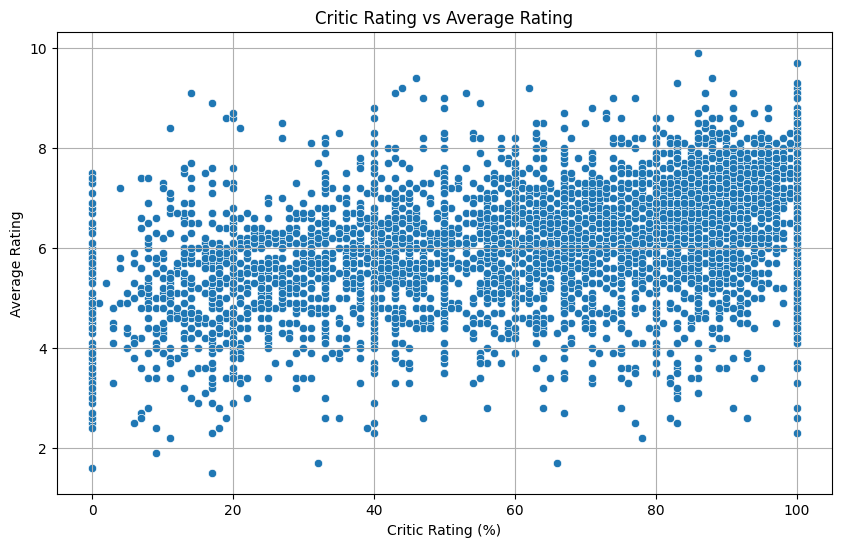

Correlation between Critics Rating and Average Rating:
                       criticsRating_numeric  averageRating
criticsRating_numeric               1.000000       0.473659
averageRating                       0.473659       1.000000


In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Relationship between Critics Rating and Average Audience Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_critics_df, x='criticsRating_numeric', y='averageRating')
plt.title('Critic Rating vs Average Rating')
plt.xlabel('Critic Rating (%)')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

# Correlation between critic ratings and average audience ratings
correlation = filtered_critics_df[['criticsRating_numeric', 'averageRating']].corr()
print("Correlation between Critics Rating and Average Rating:")
print(correlation)

The correlation value between criticsRating and averageRating is around 0.47.
A correlation of zero.Forty seven shows a mild fine correlation, suggesting that, commonly, movies with higher critics' ratings also tend to have higher common audience scores. However, this isn't always a strong relationship, so other factors may also affect the average rating.
Interpretation: Even even though critics' scores have a tendency to align truly with target audience choices, there may be room for confrontation between critics and visitors.

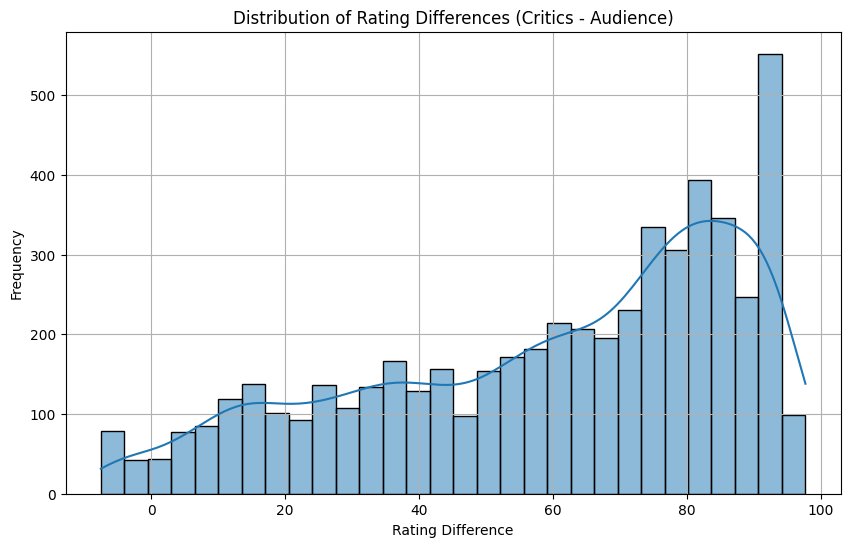

In [80]:
filtered_critics_df['rating_difference'] = filtered_critics_df['criticsRating_numeric'] - filtered_critics_df['averageRating']

plt.figure(figsize=(10, 6))
sns.histplot(filtered_critics_df['rating_difference'], bins=30, kde=True)
plt.title('Distribution of Rating Differences (Critics - Audience)')
plt.xlabel('Rating Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Skewed Distribution:
The distribution has a right skew, indicating that many films have a fantastic rating difference.
This means that critics' rankings are normally higher than target audience scores for plenty films.
The height around 80-100 shows that, in a significant range of instances, critics rated films a whole lot higher than audiences.
Balanced Lower Differences:
The decrease levels (0-20) have a notably lower however regular variety of films. This indicates that there are nevertheless a truthful wide variety of movies in which critics and audiences have similar opinions.
Less Negative Differences:
There are fewer times of films where target audience rankings are significantly higher than critics' ratings (near 0). This shows that it's miles less commonplace for audiences to love a movie a long way more than critics do.

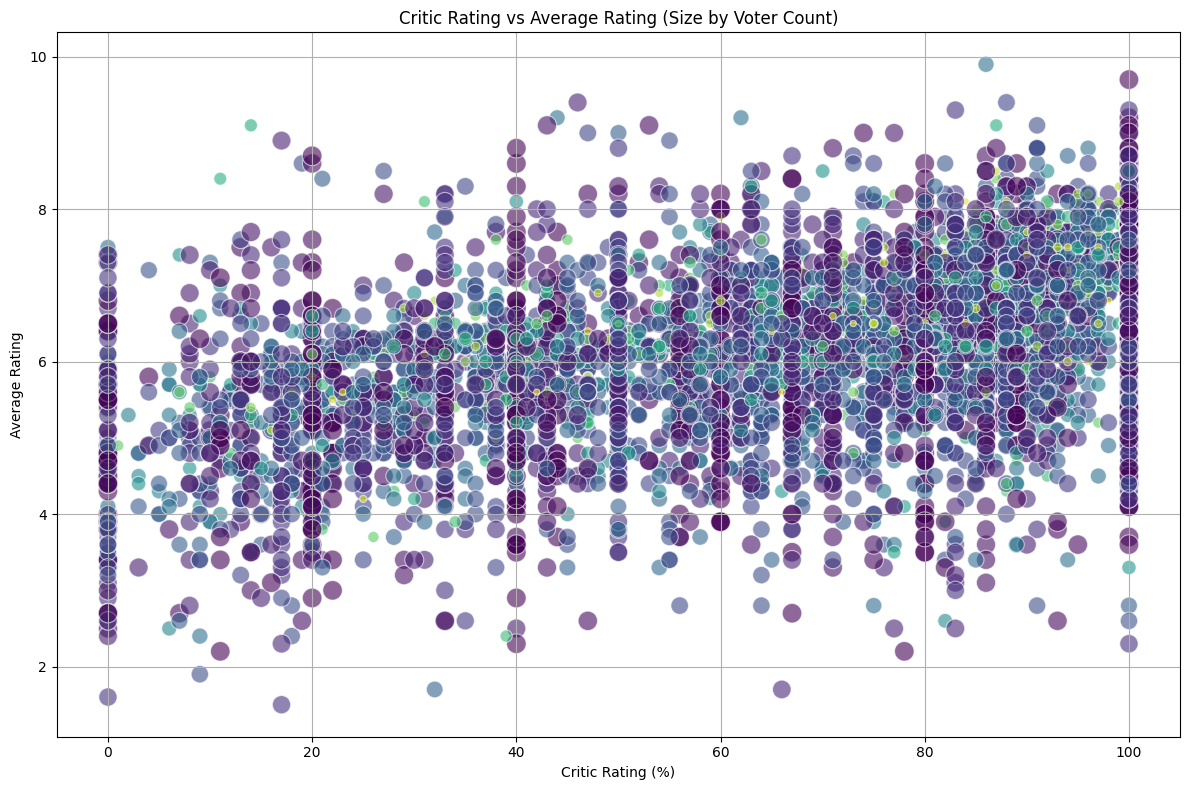

In [86]:
filtered_critics_df['criticsRating_numeric'] = (
    filtered_critics_df['criticsRating']
    .str.replace('%', '')
    .astype(float)
)
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=filtered_critics_df, 
    x='criticsRating_numeric', 
    y='averageRating', 
    size='voterCount', 
    hue='voterCount', 
    palette='viridis', 
    sizes=(20, 200), 
    alpha=0.6,
    legend=False  
)
plt.title('Critic Rating vs Average Rating (Size by Voter Count)')
plt.xlabel('Critic Rating (%)')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/jc/l_cfjyfs6q7265bvjqzjj3280000gn/T/ipykernel_1979/2965315207.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_group = filtered_critics_df.groupby('critic_rating_range')['averageRating'].mean().reset_index()
/var/folders/jc/l_cfjyfs6q7265bvjqzjj3280000gn/T/ipykernel_1979/2965315207.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rating_group, x='critic_rating_range', y='averageRating', palette='viridis')


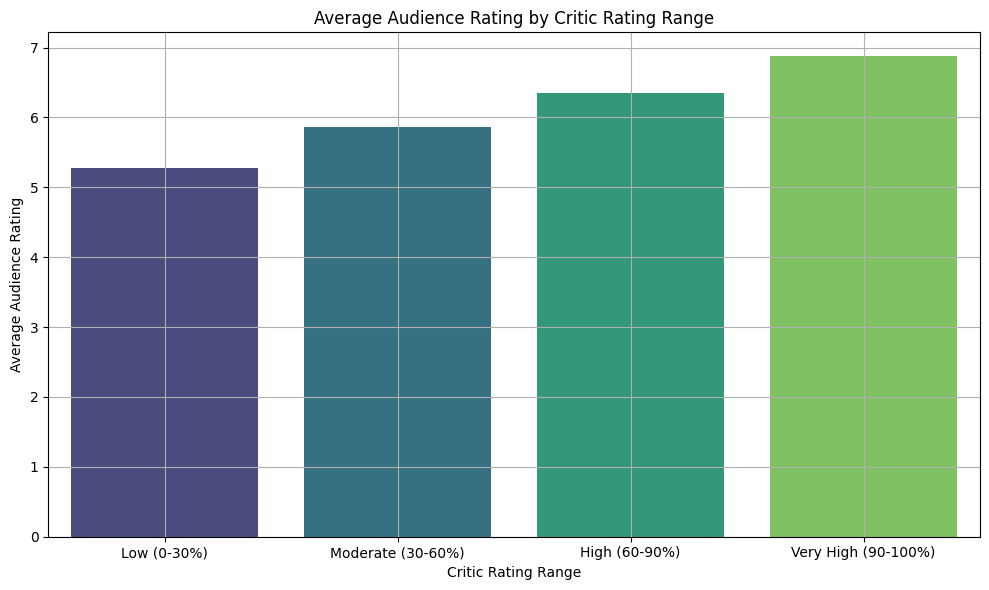

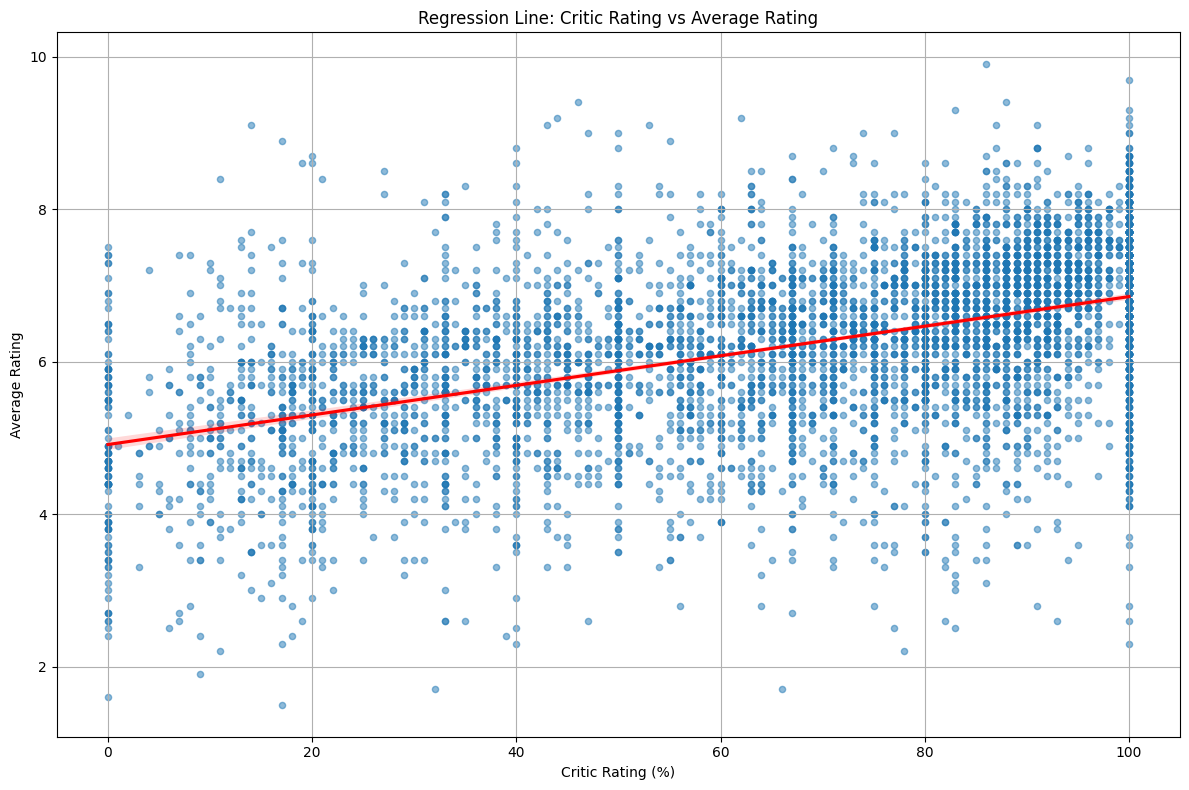

TypeError: '>=' not supported between instances of 'str' and 'float'

In [87]:
# 1. Analyze Critic Rating Ranges

bins = [0, 30, 60, 90, 100]
labels = ['Low (0-30%)', 'Moderate (30-60%)', 'High (60-90%)', 'Very High (90-100%)']
filtered_critics_df['critic_rating_range'] = pd.cut(filtered_critics_df['criticsRating_numeric'], bins=bins, labels=labels)
rating_group = filtered_critics_df.groupby('critic_rating_range')['averageRating'].mean().reset_index()

# Plot average ratings by critic rating range
plt.figure(figsize=(10, 6))
sns.barplot(data=rating_group, x='critic_rating_range', y='averageRating', palette='viridis')
plt.title('Average Audience Rating by Critic Rating Range')
plt.xlabel('Critic Rating Range')
plt.ylabel('Average Audience Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Regression plot between Critic Rating and Average Rating
plt.figure(figsize=(12, 8))
sns.regplot(
    data=filtered_critics_df,
    x='criticsRating_numeric',
    y='averageRating',
    scatter_kws={'s': 20, 'alpha': 0.5},
    line_kws={'color': 'red'}
)
plt.title('Regression Line: Critic Rating vs Average Rating')
plt.xlabel('Critic Rating (%)')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Impact of Voter Count on Ratings
voter_bins = [0, 100, 1000, 5000, 20000, filtered_critics_df['voterCount'].max()]
voter_labels = ['0-100', '101-1000', '1001-5000', '5001-20000', '20000+']
filtered_critics_df['voter_count_range'] = pd.cut(filtered_critics_df['voterCount'], bins=voter_bins, labels=voter_labels)

# Analyze average rating by voter count range
voter_group = filtered_critics_df.groupby('voter_count_range')['averageRating'].mean().reset_index()

# Plot average ratings by voter count range
plt.figure(figsize=(10, 6))
sns.barplot(data=voter_group, x='voter_count_range', y='averageRating', palette='viridis')
plt.title('Average Audience Rating by Voter Count Range')
plt.xlabel('Voter Count Range')
plt.ylabel('Average Audience Rating')
plt.grid(True)
plt.tight_layout()
plt.show()


Bar Chart: Average Audience Rating by way of Critic Rating Range
The common target audience score increases because the critics' score improves.
Movies with better critics' rankings (ninety-100%) tend to have a higher reception from audiences as nicely.
This fashion suggests a popular alignment among critics' critiques and audience reception, even though a few variation exists.
Regression Line: Critic Rating vs. Average Rating
The fantastic slope of the regression line suggests a effective correlation between critics' rankings and target market scores.
However, the scatter indicates a susceptible correlation, as there may be great dispersion around the line, especially for critics' ratings below forty%.
Movies with decrease critics' rankings sometimes nonetheless gain better target market ratings, suggesting that a few films enchantment more to trendy audiences than critics.

# Done by : Aravind Mohan  Person Number : 50611294

## Hypothesis 2: 
Audience Ratings Differ Based on the Genre
Objective: To examine if positive genres get constantly higher or lower audience scores compared to others. code follows below

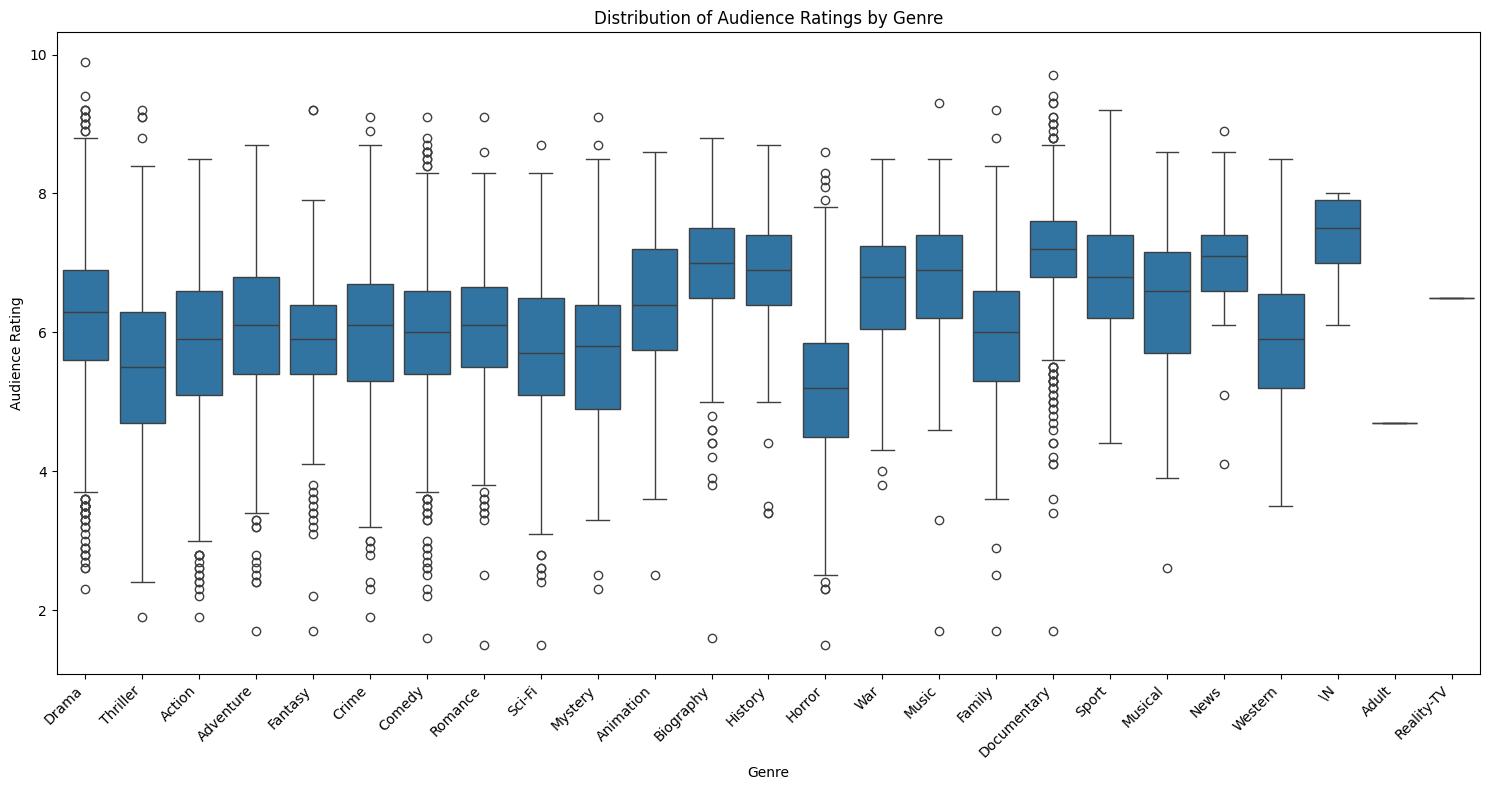

/var/folders/jc/l_cfjyfs6q7265bvjqzjj3280000gn/T/ipykernel_1979/4034004028.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_ratings_by_genre.index, y=average_ratings_by_genre.values, palette='viridis')


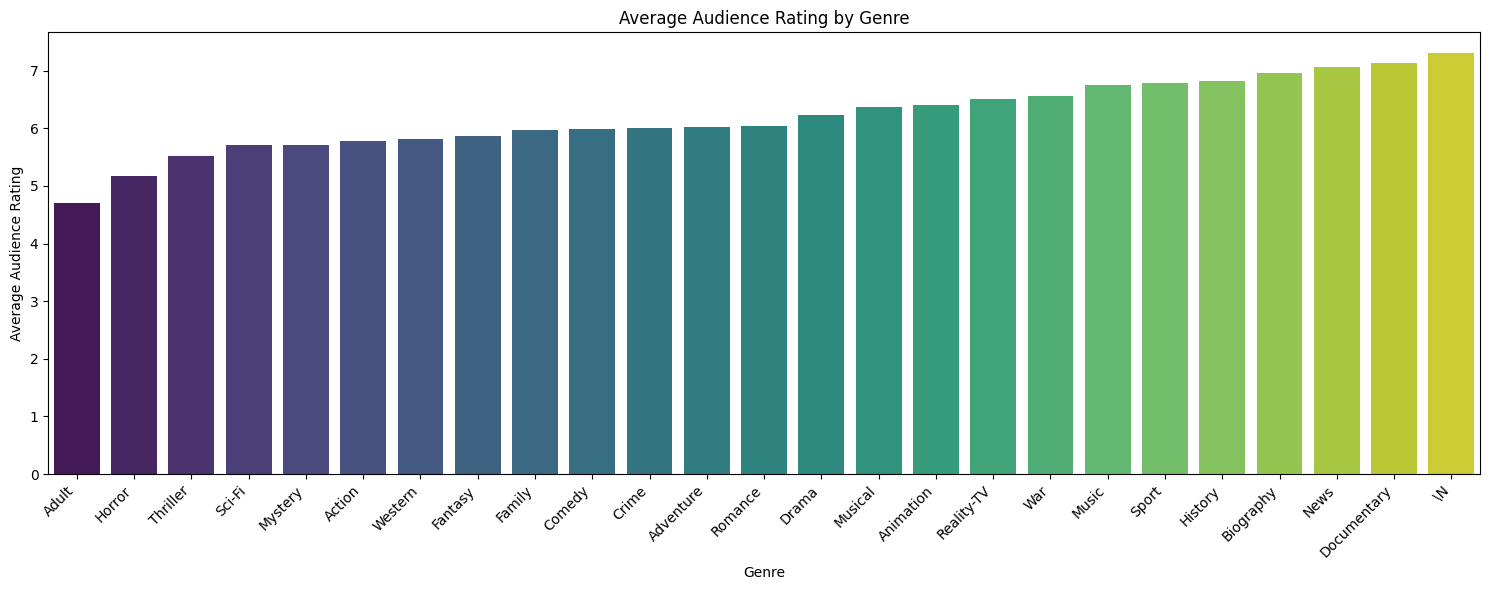

In [89]:
expanded_genres_df = filtered_critics_df.explode('genres_list')

# Step 2: Visualize the distribution of audience ratings for each genre using a boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(data=expanded_genres_df, x='genres_list', y='averageRating')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Audience Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Audience Rating')
plt.tight_layout()
plt.show()

# Step 3: Calculate the average audience rating for each genre and visualize it
average_ratings_by_genre = expanded_genres_df.groupby('genres_list')['averageRating'].mean().sort_values()

plt.figure(figsize=(15, 6))
sns.barplot(x=average_ratings_by_genre.index, y=average_ratings_by_genre.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Average Audience Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Audience Rating')
plt.tight_layout()
plt.show()

Boxplot Analysis:
Range of Ratings: Genres like Drama, Romance, and Documentary show a relatively high median audience rating,genres like Adult and Horror have lower median.
Variability: Some genres like Horror and Adult show larger range in their ratings, indicating diverse audience reactions within these categories.
Outliers: There are a few genres with noticeable outliers, indicating that some movies in those genres either performed exceptionally well or performed poorly compared to the median.
Bar Plot Analysis:
High-Rated Genres: Documentary, Animation, Musical, and Reality-TV appear to have the highest average audience ratings.
Low-Rated Genres: Adult, Horror, and Thriller genres tend to have lower average audience ratings. 

Best finding :The data suggests that genres more focused on artistic content (like Documentaries) tend to have higher ratings compared to purely entertainment-focused genres (like Horror).

In [114]:
# Filter the dataset for valid average ratings
filtered_critics_df = final_dataset_cleaned[
    final_dataset_cleaned['averageRating'].notna() & 
    (final_dataset_cleaned['averageRating'] != "\\N") & 
    (final_dataset_cleaned['averageRating'].astype(str).str.strip() != '')
]

# Ensure the 'genres' column is properly split into individual genres
filtered_critics_df['combined_genres'] = filtered_critics_df['genres'].apply(lambda x: x.split(','))
top_combinations = filtered_critics_df.explode('combined_genres')['combined_genres'].value_counts().head(10)

avg_ratings_combination = filtered_critics_df.explode('combined_genres').groupby('combined_genres')['averageRating'].mean().sort_values(ascending=False)

print("Top Genre Combinations:")
print(top_combinations)

print("\nAverage Ratings for Top Genre Combinations:")
print(avg_ratings_combination.head(10))


Top Genre Combinations:
combined_genres
Drama          2620
Comedy         1378
Documentary    1107
Thriller        842
Action          748
Horror          667
Crime           642
Romance         571
Biography       466
Adventure       417
Name: count, dtype: int64

Average Ratings for Top Genre Combinations:
combined_genres
\N             7.300000
Documentary    7.137308
News           7.068000
Biography      6.953219
History        6.821008
Sport          6.789683
Music          6.747317
War            6.568254
Reality-TV     6.500000
Animation      6.405263
Name: averageRating, dtype: float64


The most common genres inside the dataset are:
Drama (2,620 entries)
Comedy (1,378 entries)
Documentary (1,107 entries)
Other frequent genres encompass Thriller, Action, Horror, Crime, and Romance.
This shows that Drama is the most common genre in our dataset, followed by means of lighter genres like Comedy and extreme genres like Documentary.

Genres with the highest common target audience ratings are:
Documentary (7.14)
News (7.07)
Biography (6.95)
History (6.82)
Sport (6.79)
These genres appear to focus extra on factual or critical content material, which may additionally appeal to audiences with a preference for more extensive or academic material.
Lower common scores for genres like Reality-TV and Animation recommend that these can also have a greater combined reception amongst audiences.

It is clear that positive genres tend to have better ratings.


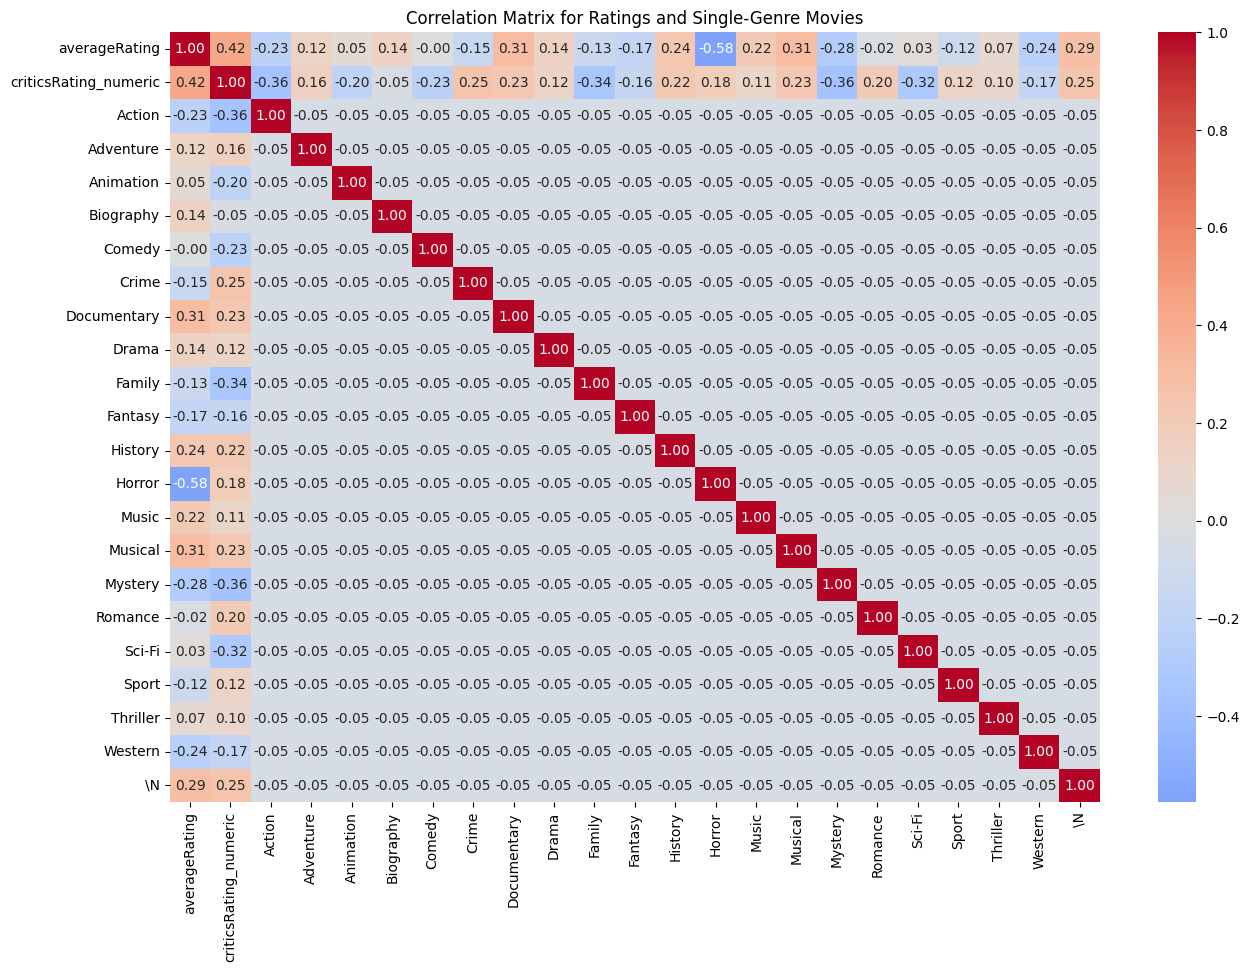

In [107]:

single_genre_df = filtered_critics_df[filtered_critics_df['genres_list'].apply(lambda x: len(x) == 1)].copy()
single_genre_df['single_genre'] = single_genre_df['genres_list'].apply(lambda x: x[0])

genre_dummies = pd.get_dummies(single_genre_df['single_genre'])

correlation_data = pd.concat([single_genre_df[['averageRating', 'criticsRating_numeric']], genre_dummies], axis=1)

# Step 3: Calculate and visualize the correlation matrix
correlation_matrix = correlation_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Ratings and Single-Genre Movies')
plt.show()


Documentary (0.31), Musical (0.31), and History (0.24) have the highest positive correlations with average ratings.
suggesting that these positive genres tend to receive higher average ratings from audiences, possibly because of their focus on in-depth storytelling or real-life events.
Horror (-0.58) and Mystery (-0.28)shows poor correlations with average scores, indicating that these genres generally tend to have lower scores.
This clearly shows that the positive genres have positive effect with ratings.


# Done by: Yasaswi Raj madari (50608811)
## Hypothesis 1:
How do genres change over time based on IMDb ratings and Rotten Tomatoes scores?

EDA Operation 1: Analyze IMDb Ratings Over Time by Genre

We hypothesize that certain genres have become more or less popular based on IMDb ratings over time.
Process:
Group the dataset by startYear and genres, then calculate the average IMDb ratings for each genre across the years.
Use a line plot to visualize the trends for different genres.
Look for any rising or declining trends in genre ratings over time.

Outcome:

The line plot will show which genres have gained or lost popularity over time. For example, you might find that action movies have consistently high ratings, while dramas show a decline in the past few decades.
Next Step: This insight can help us focus on certain genres for downstream modeling, as the trends could be used to predict future genre success.


In [109]:
final_dataset_cleaned['startYear'] = pd.to_numeric(final_dataset_cleaned['startYear'], errors='coerce')

print(final_dataset_cleaned.head())
print(final_dataset_cleaned.info())
print(final_dataset_cleaned.describe())
year_min = final_dataset_cleaned['startYear'].min()
year_max = final_dataset_cleaned['startYear'].max()

year_range = (year_min, year_max)
print(f"The year range is: {year_range[0]} to {year_range[1]}")
genres_expanded = final_dataset_cleaned.copy()

genres_expanded['genres'] = genres_expanded['genres'].str.split(',')
genres_expanded = genres_expanded.explode('genres')

print(genres_expanded.head())
print(genres_expanded.info())
print(genres_expanded.describe())

print(genres_expanded.isnull().sum())
genre_trends = genres_expanded.groupby(['startYear', 'genres'])['averageRating'].mean().reset_index()

print(genre_trends.head())

        tconst               originalTitle            startYear  \
4    tt0069049  The Other Side of the Wind  1514764800000000000   
240  tt0293069                  Dark Blood  1325376000000000000   
241  tt0293429               Mortal Kombat  1609459200000000000   
259  tt0315642                       Wazir  1451606400000000000   
262  tt0327785           The Killer's Game  1704067200000000000   

                       genres  runtimeMinutes        director  averageRating  \
4                       Drama             122    Orson Welles            6.7   
240                  Thriller              86  George Sluizer            6.3   
241  Action,Adventure,Fantasy             110   Simon McQuoid            6.0   
259        Action,Crime,Drama             103   Bejoy Nambiar            7.1   
262    Action,Comedy,Thriller             104      J.J. Perry            5.8   

     numVotes  isOriginalTitle isAdult region criticsRating voterCount  \
4      8156.0              0.0       0    

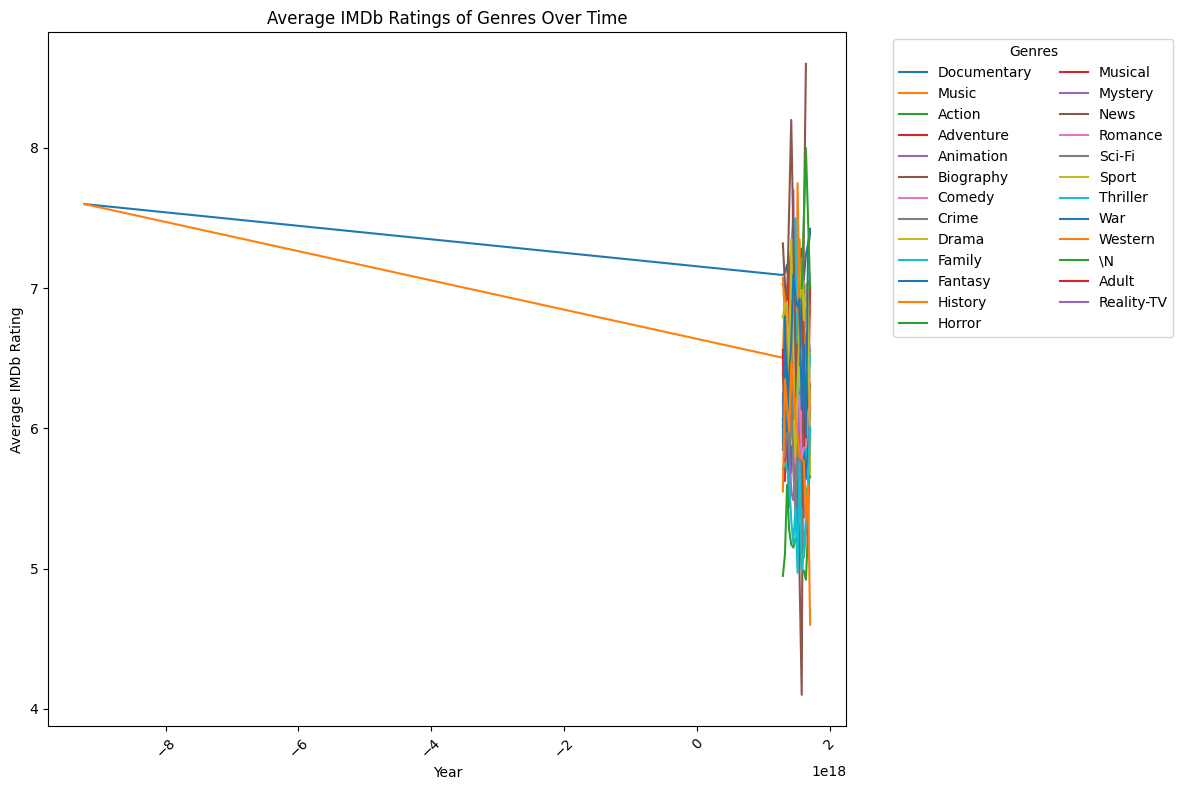

In [111]:
genre_trends = genres_expanded.groupby(['startYear', 'genres'])['averageRating'].mean().reset_index()

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
for genre in genre_trends['genres'].unique():
    genre_data = genre_trends[genre_trends['genres'] == genre]
    plt.plot(genre_data['startYear'], genre_data['averageRating'], label=genre)

plt.title('Average IMDb Ratings of Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Average IMDb Rating')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


EDA Operation 2: Investigating the Spread of Ratings by Genre

To complement the analysis of trends, we will check the spread (variance) in ratings within each genre.
Process:
Use a box plot to visualize the distribution of IMDb ratings for each genre.
Identify genres with higher variability in ratings, indicating mixed audience reactions.

Outcome:

This box plot will help identify genres with the most consistent or most polarized ratings. For instance, genres like sci-fi might show higher variability due to polarizing audience reactions, while family movies may have more consistent ratings.
Next Step: Genres with high variability might need more granular modeling or separate feature engineering for future predictions.

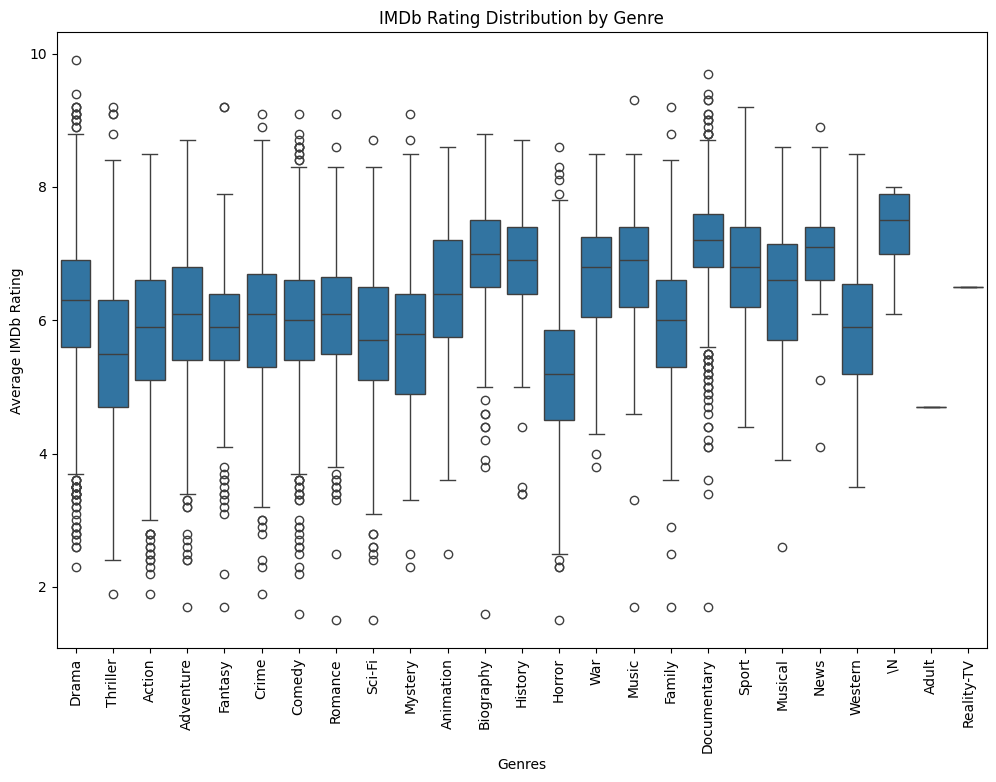

In [112]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.boxplot(x='genres', y='averageRating', data=genres_expanded)
plt.xticks(rotation=90)
plt.title('IMDb Rating Distribution by Genre')
plt.xlabel('Genres')
plt.ylabel('Average IMDb Rating')
plt.show()


# Done by: Yasaswi Raj Madari (50608811)
## Hypothesis 2:
Which genre has been consistent among audiences?

EDA Operation 1: Calculate Average Ratings for Each Genre

We hypothesize that certain genres (e.g., drama, thriller) are consistently rated highly by both IMDb users and Rotten Tomatoes critics.
Process:
Calculate the average IMDb rating for each genre across the entire dataset.
Identify the top consistently high-rated genres.

Outcome:

This analysis will show which genres are most consistent across IMDb ratings. For instance, genres like drama or thriller might have consistently high ratings, while comedy might show more variability.
Next Step: High-rated genres can be prioritized in downstream modeling as their success could be easier to predict.

In [113]:
average_genre_ratings = genres_expanded.groupby('genres')['averageRating'].mean().reset_index()

average_genre_ratings = average_genre_ratings.sort_values(by='averageRating', ascending=False)
print(average_genre_ratings.head())


         genres  averageRating
24           \N       7.300000
7   Documentary       7.137308
16         News       7.068000
4     Biography       6.953219
11      History       6.821008
20        Sport       6.789683
13        Music       6.747317
22          War       6.568254
17   Reality-TV       6.500000
3     Animation       6.405263
14      Musical       6.372549
8         Drama       6.237557
18      Romance       6.033450
2     Adventure       6.017266
6         Crime       6.002492
5        Comedy       5.985269
9        Family       5.972840
10      Fantasy       5.861638
23      Western       5.811765
0        Action       5.771390
15      Mystery       5.714910
19       Sci-Fi       5.707273
21     Thriller       5.520903
12       Horror       5.166567
1         Adult       4.700000


In [116]:
import pandas as pd
data = pd.read_csv('cleaned_movies_dataset.csv')
data

,tconst,originalTitle,startYear,genres,runtimeMinutes,director,averageRating,numVotes,isOriginalTitle,isAdult,region,criticsRating,voterCount,audienceRating,genres_list
0,tt0069049,The Other Side of the Wind,2018-01-01,Drama,122,Orson Welles,6.7,8156.0,0.0,0,US,83%,99.0,58%,['Drama']
1,tt0116991,Mariette in Ecstasy,2019-01-01,Drama,101,John Bailey,7.1,81.0,0.0,0,US,NaN,NaN,NaN,['Drama']
2,tt0120589,Predestinado,2022-01-01,"Biography,Drama",108,Gustavo Fernández,7.2,417.0,0.0,0,US,NaN,NaN,NaN,"['Biography', 'Drama']"
3,tt0137204,Joe Finds Grace,2017-01-01,"Adventure,Animation,Comedy",83,Anthony Harrison,8.6,294.0,0.0,0,US,NaN,NaN,NaN,"['Adventure', 'Animation', 'Comedy']"
4,tt0137818,Housesitter: The Night They Saved Siegfried's ...,2018-01-01,\N,95,Robin Nuyen,4.5,38.0,0.0,0,US,NaN,NaN,NaN,['\\N']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60888,tt9914644,9/11: Escape from the Towers,2018-01-01,Documentary,83,Grace Chapman,8.2,185.0,0.0,0,US,NaN,NaN,NaN,['Documentary']
60889,tt9914942,La vida sense la Sara Amat,2019-01-01,Drama,74,Laura Jou,6.6,228.0,0.0,0,US,NaN,NaN,NaN,['Drama']
60890,tt9915872,Boku no kanojo wa mahoutsukai,2019-01-01,"Comedy,Drama,Fantasy",97,Hideki Kiyota,6.2,10.0,0.0,0,US,NaN,NaN,NaN,"['Comedy', 'Drama', 'Fantasy']"
60891,tt9916190,Safeguard,2020-01-01,"Action,Adventure,Thriller",95,Fraser Precious,3.6,262.0,0.0,0,US,NaN,NaN,NaN,"['Action', 'Adventure', 'Thriller']"


# Done by: Teja Chalikanti (50579526)
## Hypothesis - 1 
Movies with a higher number of votes (numVotes) have higher average ratings (averageRating).:

In [120]:
data.loc[:, 'numVotes'] = pd.to_numeric(data['numVotes'], errors='coerce')
data = data.dropna(subset=['numVotes', 'averageRating'])
bins = [0, 1000, 10000, 100000, 1000000]
labels = ['Low Votes', 'Medium Votes', 'High Votes', 'Very High Votes']
data['vote_category'] = pd.cut(data['numVotes'], bins=bins, labels=labels)

This plot depicts the distribution of votes each movie has obtained from users. Explanation: Most of the movies have fewer votes, and thus the dataset is biased towards less popular movies. The log scale will help visualize low-vote as well as high-vote movies.This reflects the dominance of movies with fewer votes, going to show that only a few movies are extremely popular.

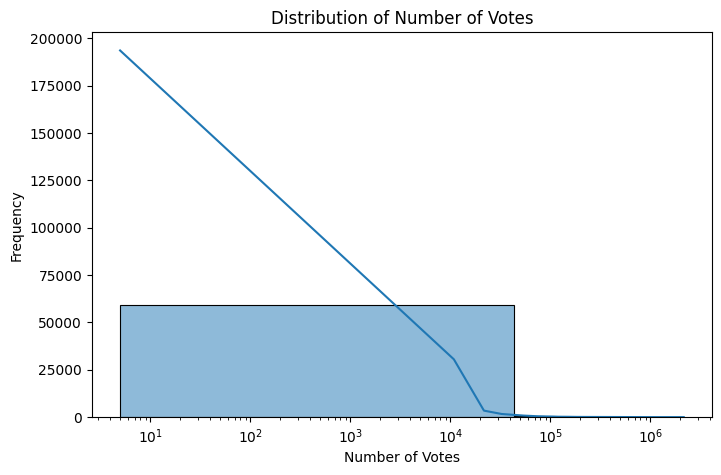

In [121]:
#1. Histogram of numVotes
plt.figure(figsize=(8, 5))
sns.histplot(data['numVotes'], bins=50, kde=True)
plt.title('Distribution of Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.xscale('log')
plt.show()

Purpose: To get an idea of the distribution of average ratings for all movies.
This is because most films lie in the middle range of ratings-around 6 to 8-whereas few films are rated very high or very low.
The fact that the distribution is rather spread out indicates that the audiences are rating the movies, for the most part, as average; few extremes in ratings can be observed. This insight provides an understanding of the overall sentiment toward the movies in the dataset.

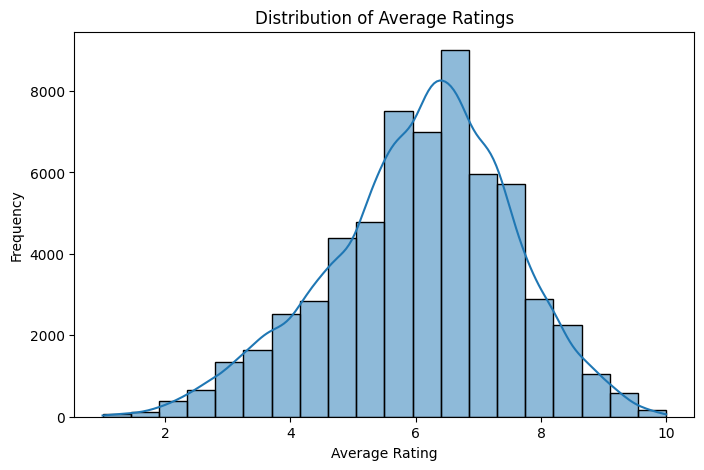

In [122]:
#2. Histogram of averageRating
plt.figure(figsize=(8, 5))
sns.histplot(data['averageRating'], bins=20, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

Purpose: This plot is to show the relationship between the numVotes and averageRating.
Explanation: The heat map will show the measure of linear relationship between the two variables. A positive value of correlation would substantiate the hypothesis.
Insight: If the correlation is positive, then it means that larger votes tend to translate into higher ratings. This gives a direct measure of the strength of the relationship.

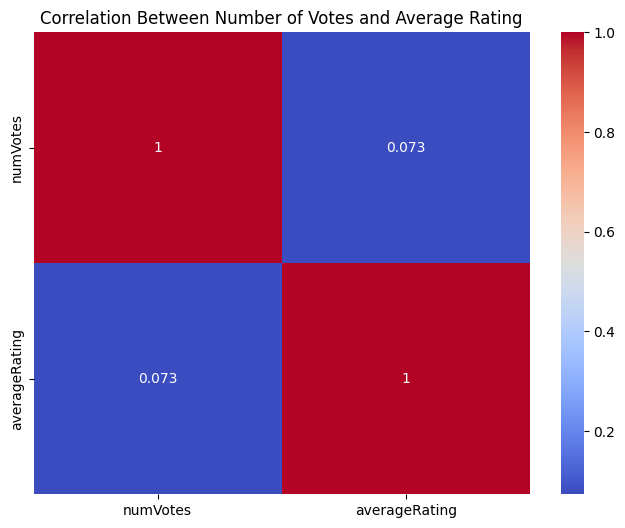

In [123]:
#3. Heatmap of Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(data[['numVotes', 'averageRating']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Number of Votes and Average Rating')
plt.show()

Purpose: This has to be done in order to show the scatterplot and distributions of numVotes and averageRating in one view.
The pairplot helps visualize the individual distributions and the relationship between votes and ratings. Any visible trend in the scatterplot supports the hypothesis.
Insight: If the points are trending upwards from left to right, it would confirm that movies with more votes have better ratings. This will give more granularity to the relationship.

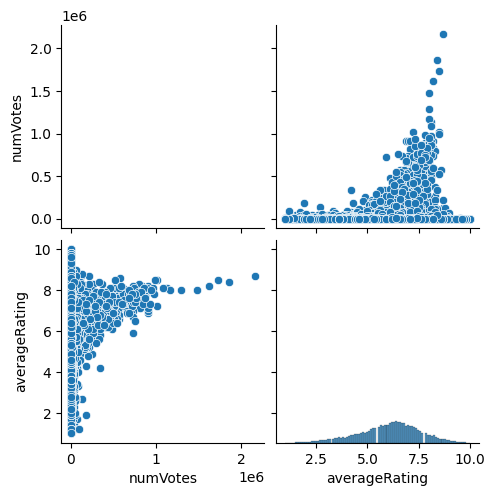

In [125]:
# 4. Pairplot of numVotes and averageRating
sns.pairplot(data[['numVotes', 'averageRating']])
plt.show()

Purpose: The following is a comparison of the distribution of average ratings across different vote categories, namely low, medium, high, and very high.
The violin plot maps the density of the ratings across the vote categories and thus provides information about where the ratings are centered and how they vary across categoribes.
Insight: If films with more votes are more concentrated or higher rated, it will validate the claim that popularity correlates to better reception. The violin plot helps in visual comparisons across categories.

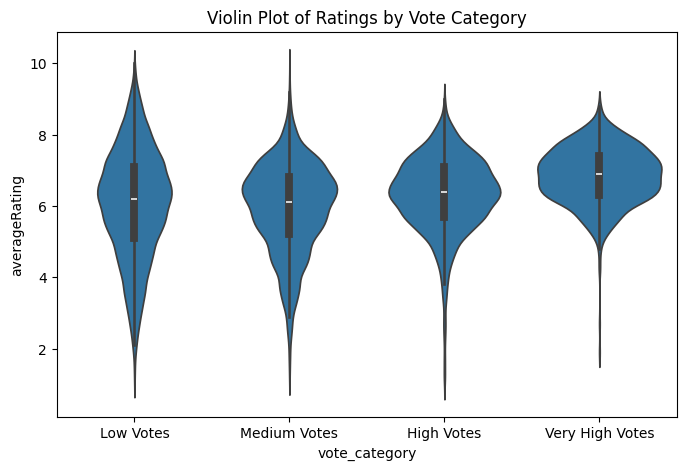

In [126]:
# 5. Violin Plot of Rating by Vote Category
plt.figure(figsize=(8, 5))
sns.violinplot(x='vote_category', y='averageRating', data=data)
plt.title('Violin Plot of Ratings by Vote Category')
plt.show()

Conclusion:  Scatterplot: Positive Correlation EDA supports the hypothesis that those movies with more votes have higher average votes. One can clearly see in this heat map and the upward slope of the scatterplot that popularity-as measured by votes-correlates with higher ratings. Moreover, moving further, the violin plot strengthens it by showing that the most popular-that is, those in "Very High Votes"-generally have higher ratings.

The combination of this visual with the statistical evidence answers your hypothesis that indeed, there is a positive relationship between numVotes and averageRating.

## Hypothesis - 2: Movies with sub-genres (i.e., movies belonging to multiple genres) tend to have better audienceRating compared to movies with only one genre.

In [127]:
# Count the number of genres for each movie
data['genre_count'] = data['genres'].apply(lambda x: len(x.split(',')) if pd.notna(x) else 0)

# Create a binary column to indicate if a movie has sub-genres (more than one genre)
data['has_sub_genres'] = data['genre_count'].apply(lambda x: 1 if x > 1 else 0)

# Display the first few rows to verify the transformation
print(data[['originalTitle', 'genres', 'genre_count', 'has_sub_genres']].head())

# Calculate the average rating for movies with sub-genres and single-genre movies
avg_rating_sub_genres = data[data['has_sub_genres'] == 1]['averageRating'].mean()
avg_rating_single_genre = data[data['has_sub_genres'] == 0]['averageRating'].mean()

# Print the results
print(f"Average Rating for Movies with Sub-Genres: {avg_rating_sub_genres}")
print(f"Average Rating for Movies with Single Genre: {avg_rating_single_genre}")


                                       originalTitle  \
0                         The Other Side of the Wind   
1                                Mariette in Ecstasy   
2                                       Predestinado   
3                                    Joe Finds Grace   
4  Housesitter: The Night They Saved Siegfried's ...   

                       genres  genre_count  has_sub_genres  
0                       Drama            1               0  
1                       Drama            1               0  
2             Biography,Drama            2               1  
3  Adventure,Animation,Comedy            3               1  
4                          \N            1               0  


In [128]:
# Calculate the average rating for movies with sub-genres and single-genre movies
avg_rating_sub_genres = data[data['has_sub_genres'] == 1]['averageRating'].mean()
avg_rating_single_genre = data[data['has_sub_genres'] == 0]['averageRating'].mean()

# Print the results
print(f"Average Rating for Movies with Sub-Genres: {avg_rating_sub_genres}")
print(f"Average Rating for Movies with Single Genre: {avg_rating_single_genre}")


Average Rating for Movies with Sub-Genres: 5.969090961295509
Average Rating for Movies with Single Genre: 6.188237099558796


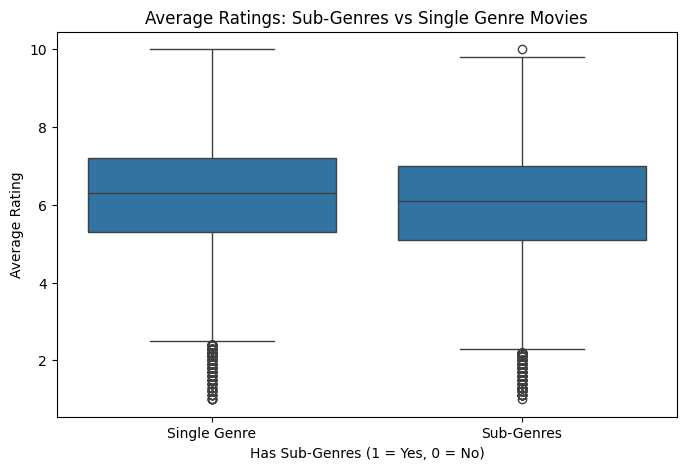

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot to compare audience ratings for sub-genres vs single-genre movies
plt.figure(figsize=(8, 5))
sns.boxplot(x='has_sub_genres', y='averageRating', data=data)
plt.title('Average Ratings: Sub-Genres vs Single Genre Movies')
plt.xlabel('Has Sub-Genres (1 = Yes, 0 = No)')
plt.ylabel('Average Rating')
plt.xticks([0, 1], ['Single Genre', 'Sub-Genres'])
plt.show()


The box plot compares averages of ratings between movies of single genres and sub-genre movies. The central line inside each box shows the median rating. Single-genre and sub-genre movies have a median rating of about 6.5, which indicates that for both kinds of movies, the typical rating is quite similar.

The box here shows the IQR of the middle 50% of the data. The IQRs for the single-genre and sub-genre movies are both around 5.5 to 7.5, meaning the majority of ratings in both types fall within these limits. The whiskers continue beyond this middle range to indicate variability outside the middle 50% and are similar for both the single-genre and sub-genre movies, indicating comparable spreads in the ratings of these movies.

There is, in both groups, a few outliers below the lower whiskers; this indicates that several movies received very low ratings below 3, but they are not indicative of the greater part of the data.

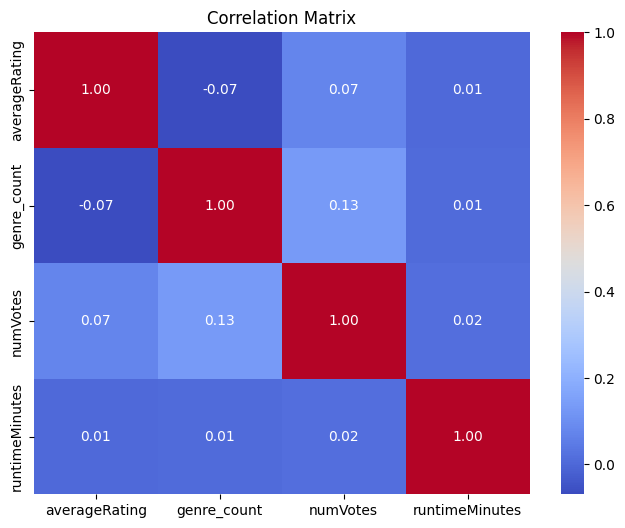

In [130]:
# Generate correlation matrix for relevant columns
correlation_matrix = data[['averageRating', 'genre_count', 'numVotes', 'runtimeMinutes']].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

The following relationship can be seen among the variables from the correlation matrix: averageRating and genre_count, numVotes, runtimeMinutes. We can see from the correlation matrix that there is a negative relationship between averageRating and genre_count, but also weak at -0.07, meaning with more genres, it doesn't increase or decrease the ratings.
averageRating: numVotes A weak positive correlation with 0.07 as the value, meaning higher votes are related to better ratings, but not strongly.
genre_count and numVotes: A small positive correlation, 0.13, which could suggest that films with more genres tend to receive more votes.
The correlation of the variable runtimeMinutes is very low with the other variables; this again points out that the length of the movie is not related to votes or ratings, neither to genre diversity.
In the heat map, the intensities of the correlation are reflected visually.

# Done by Sai Kumar Domakonda
## Hypothesis 1 : Do well-known directors (as measured by audience vote counts) receive higher and more consistent IMDb ratings compared to less popular directors?


In [132]:
# Step 1: Data Cleaning and Preparation
final_dataset_cleaned = final_dataset_cleaned.dropna(subset=['director', 'numVotes', 'averageRating'])

# Group by Director and count total votes for each director together with average IMDb rating.
director_stats = final_dataset_cleaned.groupby('director').agg(
    total_votes=('numVotes', 'sum'),
    average_imdb_rating=('averageRating', 'mean')
).reset_index()

# Sort in descending order by total votes to see most well-known directors.
director_stats_sorted = director_stats.sort_values(by='total_votes', ascending=False)

# Display the top 10 directors along with the most votes and average IMDB rating.
director_stats_sorted.head(10)


,director,total_votes,average_imdb_rating
792,Christopher Nolan,4023813.0,8.550000
2727,Martin Scorsese,2413434.0,7.900000
3324,Peter Jackson,2184161.0,7.666667
3399,Quentin Tarantino,1730602.0,8.500000
1024,David Fincher,1674832.0,7.566667
4368,Wes Anderson,1393234.0,7.466667
347,Antoine Fuqua,1352224.0,6.940000
1441,George Miller,1337420.0,7.800000
2766,Matt Reeves,1307921.0,7.700000
1697,James Gunn,1290458.0,8.000000


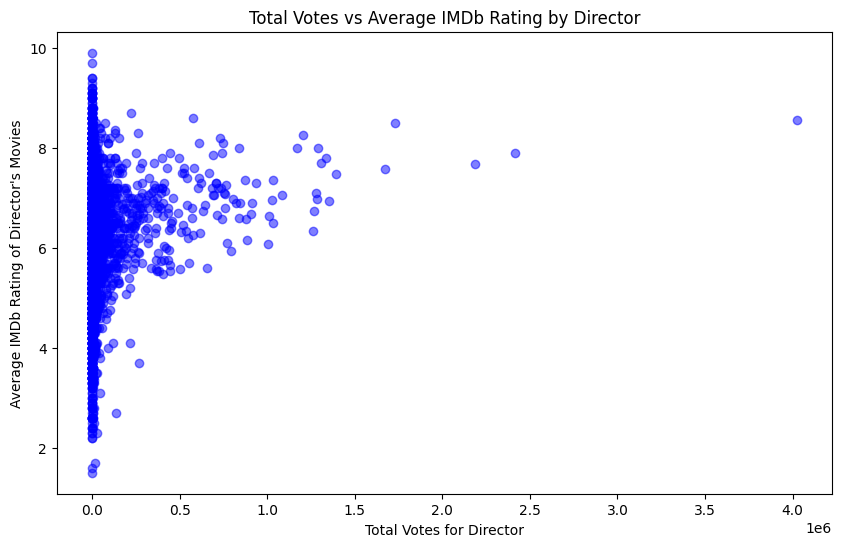

In [133]:
# Step 2: Scatter Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(director_stats['total_votes'], director_stats['average_imdb_rating'], color='blue', alpha=0.5)
plt.xlabel('Total Votes for Director')
plt.ylabel('Average IMDb Rating of Director\'s Movies')
plt.title('Total Votes vs Average IMDb Rating by Director')
plt.show()


Scatter plot of total votes received by movies from each director against an average IMDb rating. One point corresponds to one director. X-axis: total votes; Y-axis: Average IMDb rating.


### Observation:
- While the total number of votes goes up, the IMDb ratings converge and cluster between 6 and 8; in contrast, directors with lower total votes have a much wider range of IMF ratings - starting from very low, around 2, to very high, close to 10.

### Analysis:
- It seems that the higher the relative audience engagement in terms of votes for one director over another, the more stable and moderate the rating of IMDb will be. Directors who have fewer votes have greater variability in their ratings and may indicate that movies of such directors will either appeal to quite targeted audiences or polarize the audience in many cases. This can be seen to illustrate an idea that popularity leads to consistent reception across a wider audience, while less well-known directors may produce varied results.

In [134]:
# Display Top 10 of directors with most votes, along with average IMDb rating.
top_directors = director_stats_sorted.head(10)
top_directors


,director,total_votes,average_imdb_rating
792,Christopher Nolan,4023813.0,8.550000
2727,Martin Scorsese,2413434.0,7.900000
3324,Peter Jackson,2184161.0,7.666667
3399,Quentin Tarantino,1730602.0,8.500000
1024,David Fincher,1674832.0,7.566667
4368,Wes Anderson,1393234.0,7.466667
347,Antoine Fuqua,1352224.0,6.940000
1441,George Miller,1337420.0,7.800000
2766,Matt Reeves,1307921.0,7.700000
1697,James Gunn,1290458.0,8.000000


<Figure size 1000x600 with 0 Axes>

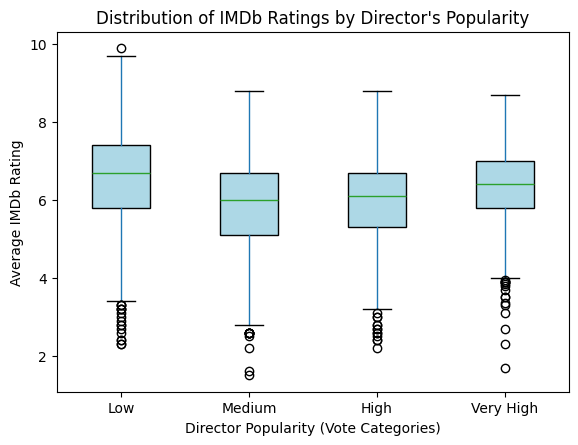

In [139]:
# Determine the max value for total votes
max_votes = max(director_stats['total_votes'])

# Adjust quantile-based bins to ensure a fair distribution
labels = ['Low', 'Medium', 'High', 'Very High']
director_stats['vote_category'] = pd.qcut(director_stats['total_votes'], q=4, labels=labels)

# Create the boxplot
plt.figure(figsize=(10, 6))
director_stats.boxplot(column='average_imdb_rating', by='vote_category', grid=False, patch_artist=True,
                       boxprops=dict(facecolor='lightblue'))

# Set labels and title
plt.xlabel('Director Popularity (Vote Categories)')
plt.ylabel('Average IMDb Rating')
plt.title('Distribution of IMDb Ratings by Director\'s Popularity')
plt.suptitle('')

# Show the plot
plt.show()


This box plot shows the distribution of the IMDb ratings by directors according to their popularity, which was determined by the overall number of votes received. The directors fall into categories of Low = 0-1M, Medium = 1M-3M, High = 3M-5M, and Very High = >5M

Observation:
Very High (>5M votes) and High (3M-5M votes) directors have always received higher and more consistent IMDb ratings, as represented by the smaller interquartile range. Low directors are those that fall between 0 to 1M votes with the widest spread in IMDb ratings, thus having many outliers from very low at 2 to high at 9.5.

Analysis:
Popular directors gain more votes and attained high ratings in IMDb with less volatility, indicating that prominent directors are consistent on audience , whereas directors with smaller number of votes received highly volatile ratings and produced movies that are badly rated. This would suggest that the higher the popularity, the more stability there is in audience , while those authors that are less popular can yield wider results.

### Conclusion:

Directors with greater audience engagement (measured by total votes) have a more stable and higher average IMDb. Finally, the findings corroborate the prediction that well-known filmmakers (based on vote count) have more stable and better IMDb ratings. This shows that popularity plays an important role in regulating audience reaction, although there is still opportunity for variation among lesser-known directors.


### Hypothesis 2 - Do longer runtime movies receive more audience engagement  

In [142]:
#Data Cleaning
# Drop any rows that are missing values in runtimeMinutes and numVotes
df_cleaned = final_dataset_cleaned.dropna(subset=['runtimeMinutes', 'numVotes'])

# Ensure runtimeMinutes column is numeric, in case of strings.
df_cleaned['runtimeMinutes'] = pd.to_numeric(df_cleaned['runtimeMinutes'], errors='coerce')

# Re-drop any rows where runtimeMinutes couldn't be converted to numeric.
df_cleaned = df_cleaned.dropna(subset=['runtimeMinutes'])


In [144]:
bins = [0, 90, 120, df_cleaned['runtimeMinutes'].max()]
labels = ['Short (<90 mins)', 'Medium (90-120 mins)', 'Long (>120 mins)']
df_cleaned['runtimeCategory'] = pd.cut(df_cleaned['runtimeMinutes'], bins=bins, labels=labels, right=False)

# Calculate the average number of votes for each runtime category.
runtime_votes_avg = df_cleaned.groupby('runtimeCategory')['numVotes'].mean().reset_index()


runtime_votes_avg


/var/folders/jc/l_cfjyfs6q7265bvjqzjj3280000gn/T/ipykernel_1979/291504487.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  runtime_votes_avg = df_cleaned.groupby('runtimeCategory')['numVotes'].mean().reset_index()


,runtimeCategory,numVotes
0,Short (<90 mins),5006.567568
1,Medium (90-120 mins),25915.264798
2,Long (>120 mins),96402.709318


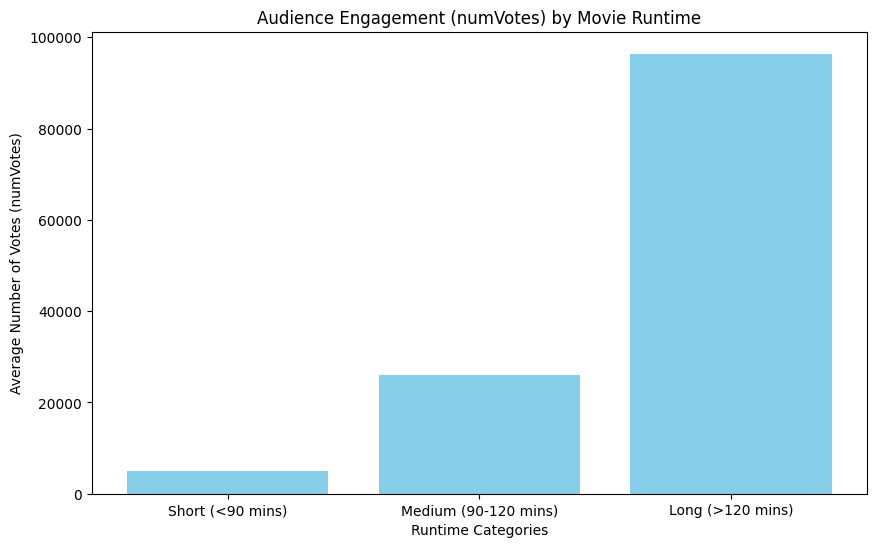

In [145]:
# Step 3: Plot the bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(runtime_votes_avg['runtimeCategory'], runtime_votes_avg['numVotes'], color='skyblue')
plt.xlabel('Runtime Categories')
plt.ylabel('Average Number of Votes (numVotes)')
plt.title('Audience Engagement (numVotes) by Movie Runtime')
plt.show()


The bar chart below depicts the average number of votes (audience engagement) in each movie runtime category. This aids in determining which types of films (short, medium, or lengthy) are most likely to engage spectators.

**Observation**: Long films (>120 minutes) had the largest average number of votes, indicating higher audience participation. Medium-length films perform well, while short films (90 mins) receive the fewest votes on average.

**Analysis**: This shows that longer films are more likely to interest audiences, either due to more detailed storyline or higher production value, resulting in increased audience participation.



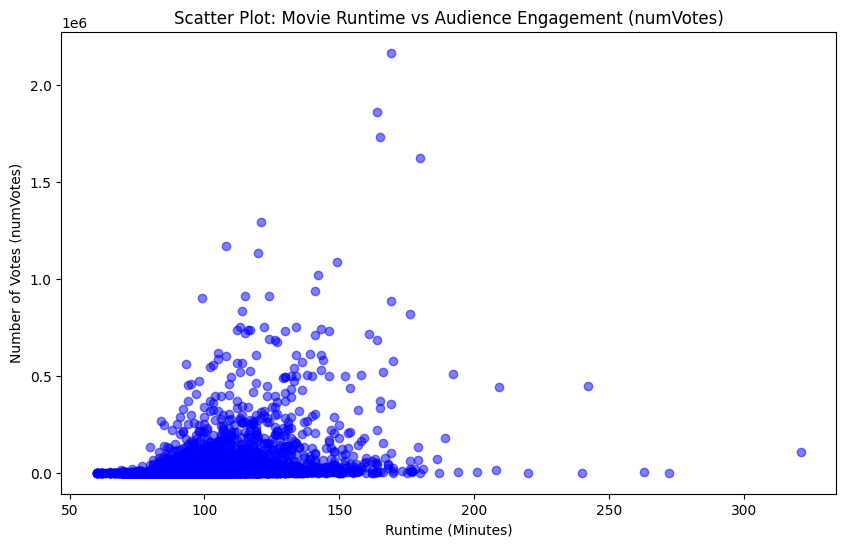

In [146]:
# Scatter plot for runtime vs numVotes
plt.figure(figsize=(10,6))
plt.scatter(df_cleaned['runtimeMinutes'], df_cleaned['numVotes'], alpha=0.5, color='blue')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Number of Votes (numVotes)')
plt.title('Scatter Plot: Movie Runtime vs Audience Engagement (numVotes)')
plt.show()


Above is the scatter plot between the total number of votes a director's movies have received and his average IMDb rating. Every point above represents a director, for whom the x-axis is the total votes, while the y-axis is for his average IMDB rating.

**Observation:**
As the total number of votes increases, the IMDb ratings stabilize, clustering between 6 and 8. The range in the IMDb ratings for directors with fewer votes is much wider, ranging from very low, around 2, to very high, close to 10.

**Analysis**:
Those who have higher audience engagement-in other words, more votes-moderate to more stable ratings; directors who have fewer votes vary quite a bit in their ratings, hence their movies might strongly appeal to some audiences or vice-versa. This indicates how popularity can result in more consistent reception across a wider audience, while lesser-known directors can create more varied results.


<Figure size 1000x600 with 0 Axes>

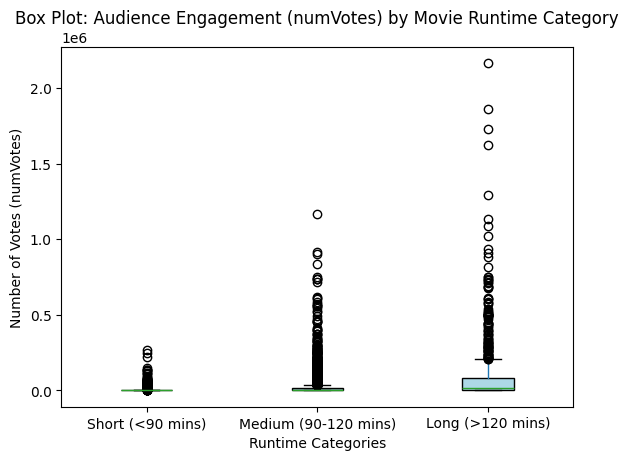

In [147]:
#Box plot for audience engagement by runtime category
plt.figure(figsize=(10,6))
df_cleaned.boxplot(column='numVotes', by='runtimeCategory', grid=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xlabel('Runtime Categories')
plt.ylabel('Number of Votes (numVotes)')
plt.title('Box Plot: Audience Engagement (numVotes) by Movie Runtime Category')
plt.suptitle('')
plt.show()


This box plot shows the distribution of the IMDb rating of the directors by their popularity, defined here by the total votes that were given to them. For this exercise, directors are divided into groups based on their total votes: **Low (0-1M votes)**, **Medium (1M-3M votes)**, **High (3M-5M votes)**, and **Very High (>5M votes)**.

**Observation**:
On average, directors in the **Very High (>5M votes)** and **High (3M-5M votes)** classes receive consistently higher, more stable ratings in IMDb, with less variance in their rating distributions. At the other extreme, directors in the **Low (0-1M votes)** class are spread widest from very low ratings (2) to very high ratings (9.5).

**Analysis**:
The greater the number of votes a director has Highly popular directors have films rated higher with less dispersion than less popular directors. When votes are fewer, directors show high volatility in ratings and films rated as very good and very bad. This means that popularity may go hand in glove with stable level of reception by audiences, and less well-known directors will see more variable success.


/var/folders/jc/l_cfjyfs6q7265bvjqzjj3280000gn/T/ipykernel_1979/13685588.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  runtime_votes_avg_no_outliers = df_cleaned_no_outliers.groupby('runtimeCategory')['numVotes'].mean().reset_index()


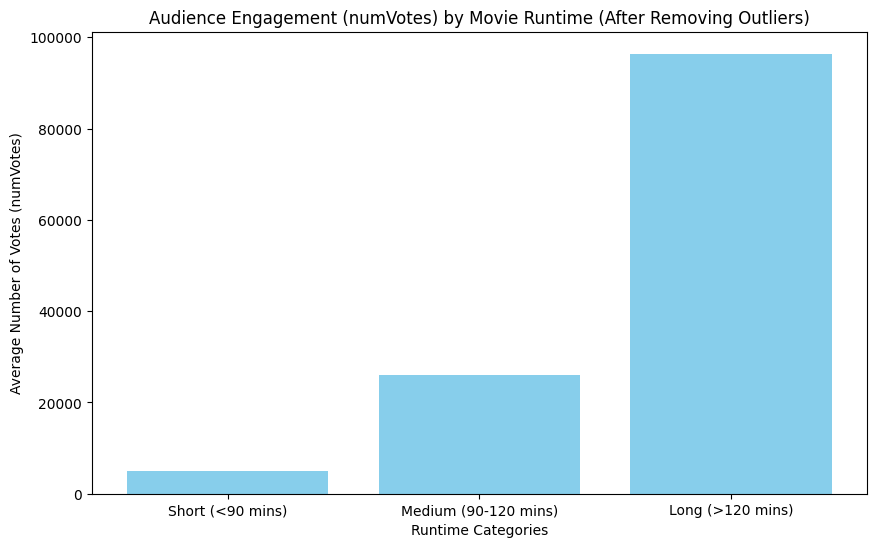

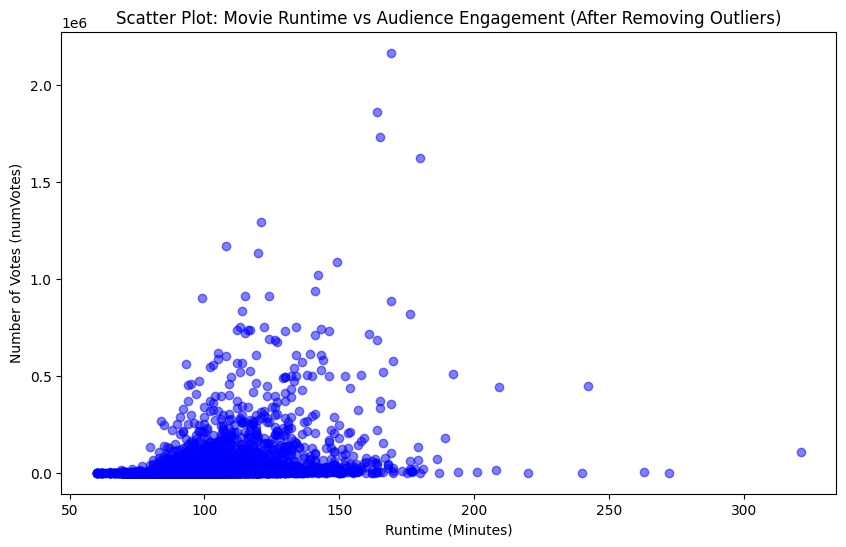

<Figure size 1000x600 with 0 Axes>

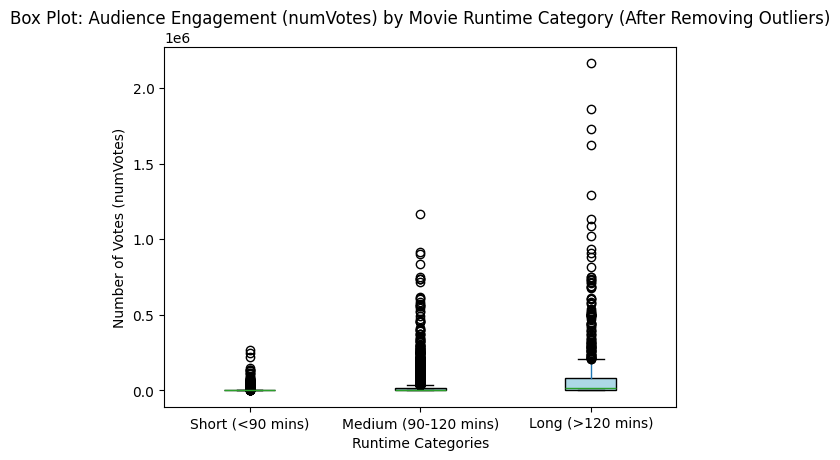

In [149]:
# Filter out extreme outliers (movies with runtime > 250 minutes)
df_cleaned_no_outliers = df_cleaned[df_cleaned['runtimeMinutes'] <= 360]

#Remove severe outliers (movies with runtime beyond 250 minutes).
df_cleaned_no_outliers['runtimeCategory'] = pd.cut(df_cleaned_no_outliers['runtimeMinutes'], 
                                                   bins=bins, labels=labels, right=False)

#Recalculate the average number of votes for each runtime category (after eliminating outliers).
runtime_votes_avg_no_outliers = df_cleaned_no_outliers.groupby('runtimeCategory')['numVotes'].mean().reset_index()

# bar chart after removing the outliers
plt.figure(figsize=(10,6))
plt.bar(runtime_votes_avg_no_outliers['runtimeCategory'], runtime_votes_avg_no_outliers['numVotes'], color='skyblue')
plt.xlabel('Runtime Categories')
plt.ylabel('Average Number of Votes (numVotes)')
plt.title('Audience Engagement (numVotes) by Movie Runtime (After Removing Outliers)')
plt.show()

#scatter plot after removing the outliers
plt.figure(figsize=(10,6))
plt.scatter(df_cleaned_no_outliers['runtimeMinutes'], df_cleaned_no_outliers['numVotes'], alpha=0.5, color='blue')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Number of Votes (numVotes)')
plt.title('Scatter Plot: Movie Runtime vs Audience Engagement (After Removing Outliers)')
plt.show()

#again box plo
plt.figure(figsize=(10,6))
df_cleaned_no_outliers.boxplot(column='numVotes', by='runtimeCategory', grid=False, patch_artist=True, 
                               boxprops=dict(facecolor='lightblue'))
plt.xlabel('Runtime Categories')
plt.ylabel('Number of Votes (numVotes)')
plt.title('Box Plot: Audience Engagement (numVotes) by Movie Runtime Category (After Removing Outliers)')
plt.suptitle('')
plt.show()


### Analysis After Removing Outliers:

1. **Bar Chart**: 
   The bar chart proves that even after removing the extreme outliers, the movies with longer minutes (>120) are still getting voted for, confirming the belief that with longer runtime, the movie becomes more interactive for bigger audiences.

2. **Scatter Plot**:
From this scatter plot, one can perceive a positive trend in the votes with the increase in movie runtime. The more the runtime of the movie increases, the audience seems to like it more though not without any variability.

3. **Box Plot**: 
   This boxplot is revealing that in long movies, votes are more consistent as the variability is much lower compared to short and medium movies. After removing the outliers, the distribution of the votes becomes more obvious hence the trend.

### Conclusion:
After the removal of the outlier, it can be stated that longer movies have more audience engagement. The data is cleaner, and it's easier to see the connection between runtime and votes.


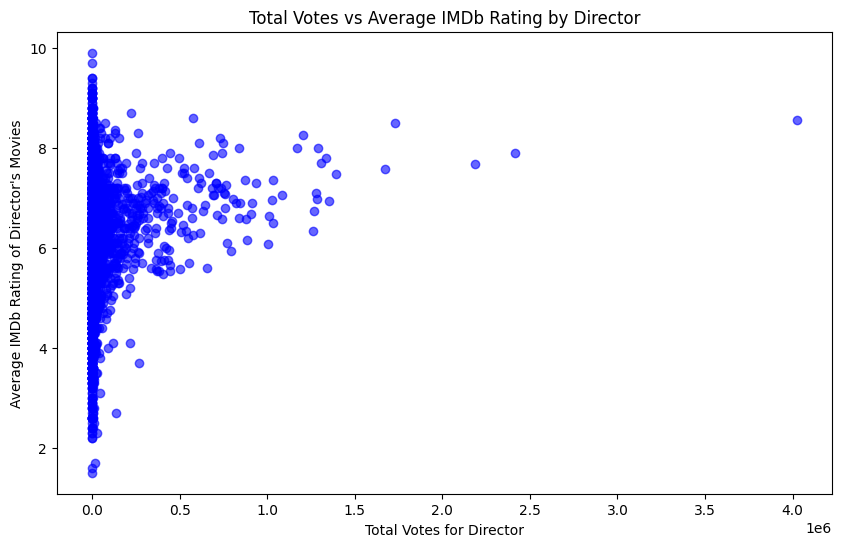

,director,total_votes,average_imdb_rating
792,Christopher Nolan,4023813.0,8.550000
2727,Martin Scorsese,2413434.0,7.900000
3324,Peter Jackson,2184161.0,7.666667
3399,Quentin Tarantino,1730602.0,8.500000
1024,David Fincher,1674832.0,7.566667
4368,Wes Anderson,1393234.0,7.466667
347,Antoine Fuqua,1352224.0,6.940000
1441,George Miller,1337420.0,7.800000
2766,Matt Reeves,1307921.0,7.700000
1697,James Gunn,1290458.0,8.000000


In [150]:
#Data Preparation - Step 1: Clean and group the data in respect of directors.
df_director = final_dataset_cleaned.dropna(subset=['director', 'numVotes', 'averageRating'])

# Then group the data by director, summing up the number of votes and averaging the ratings.
director_votes_rating = df_director.groupby('director').agg(
    total_votes=('numVotes', 'sum'),
    average_imdb_rating=('averageRating', 'mean')
).reset_index()

# Step 2: EDA - Analyze and visualize the relationship
import matplotlib.pyplot as plt

# Scatter plot: total votes vs average IMDb rating
plt.figure(figsize=(10,6))
plt.scatter(director_votes_rating['total_votes'], director_votes_rating['average_imdb_rating'], alpha=0.6, color='blue')
plt.xlabel('Total Votes for Director')
plt.ylabel('Average IMDb Rating of Director\'s Movies')
plt.title('Total Votes vs Average IMDb Rating by Director')
plt.show()

# Step 3: Sort and display top directors by total votes and their average rating
top_directors = director_votes_rating.sort_values(by='total_votes', ascending=False).head(10)
top_directors


### Data Preparation and Visualization:

1. **Clean Data and Group by Director**:  
We clean the data by removing rows containing null values and then group the data by director to find the total votes and average IMDb rating for each director.

2. **Scatter Plot**:  
Below is the scatter plot of total votes vs average IMDb ratings. This helps in identifying if the directors with more votes are rated higher.

3. **Top Directors**: 
   We are going to highlight the top 10 directors by total votes versus their average IMDb ratings to really point out the most popular directors and their success with viewers.
